## 1. Importaci√≥n de Librer√≠as y Carga de Datos

In [27]:
# Importaci√≥n de todas las librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de estilo para matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Configuraci√≥n para mostrar todas las columnas en pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("üìö Librer√≠as importadas exitosamente!")
print("üêç Versi√≥n de Python:", __import__('sys').version.split()[0])
print("üêº Versi√≥n de Pandas:", pd.__version__)
print("üî¢ Versi√≥n de NumPy:", np.__version__)

üìö Librer√≠as importadas exitosamente!
üêç Versi√≥n de Python: 3.9.23
üêº Versi√≥n de Pandas: 2.3.1
üî¢ Versi√≥n de NumPy: 1.26.4


In [28]:
# Definici√≥n de nombres de columnas seg√∫n la documentaci√≥n del dataset
# Estructura: ID, Diagnosis, luego 30 features (10 caracter√≠sticas √ó 3 estad√≠sticos)
columnas = [
    "ID", "Diagnosis",
    # Mean values (1)
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    # Standard Error (2) 
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    # Worst values (3)
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Carga de datos
print("üìÅ Cargando dataset...")
df = pd.read_csv("./db/wdbc.data", names=columnas)

# Informaci√≥n b√°sica del dataset
print(f"‚úÖ Dataset cargado exitosamente!")
print(f"üìä Forma del dataset: {df.shape}")
print(f"üîç Primeras 5 filas:")
print(df.head())

üìÅ Cargando dataset...
‚úÖ Dataset cargado exitosamente!
üìä Forma del dataset: (569, 32)
üîç Primeras 5 filas:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030      

## 2. An√°lisis Exploratorio de Datos (EDA)

In [29]:
# ========================================================================================
# 2.1. INFORMACI√ìN GENERAL DEL DATASET
# ========================================================================================

print("=" * 80)
print("üìã RESUMEN GENERAL DEL DATASET")
print("=" * 80)

# Informaci√≥n b√°sica
print(f"üîπ Dimensiones: {df.shape[0]} filas √ó {df.shape[1]} columnas")
print(f"üîπ Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Tipos de datos
print(f"\nüìä TIPOS DE DATOS:")
print(df.dtypes.value_counts())

# Informaci√≥n sobre valores nulos
print(f"\n‚ùå VALORES NULOS:")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("‚úÖ ¬°Excelente! No hay valores nulos en el dataset")
else:
    print(null_counts[null_counts > 0])

# An√°lisis de la variable objetivo (Diagnosis)
print(f"\nüéØ DISTRIBUCI√ìN DE LA VARIABLE OBJETIVO (Diagnosis):")
diagnosis_counts = df['Diagnosis'].value_counts()
diagnosis_pct = df['Diagnosis'].value_counts(normalize=True) * 100

for diagnosis, count in diagnosis_counts.items():
    pct = diagnosis_pct[diagnosis]
    label = "Maligno" if diagnosis == 'M' else "Benigno"
    print(f"   {diagnosis} ({label}): {count:3d} casos ({pct:5.1f}%)")

print(f"\nüìà BALANCE DEL DATASET:")
balance_ratio = diagnosis_counts.min() / diagnosis_counts.max()
print(f"   Ratio de balance: {balance_ratio:.3f} (1.0 = perfectamente balanceado)")
if balance_ratio < 0.5:
    print("   ‚ö†Ô∏è  Dataset moderadamente desbalanceado - considerar t√©cnicas de balanceo")
else:
    print("   ‚úÖ Dataset razonablemente balanceado")

üìã RESUMEN GENERAL DEL DATASET
üîπ Dimensiones: 569 filas √ó 32 columnas
üîπ Memoria utilizada: 170.16 KB

üìä TIPOS DE DATOS:
float64    30
int64       1
object      1
Name: count, dtype: int64

‚ùå VALORES NULOS:
‚úÖ ¬°Excelente! No hay valores nulos en el dataset

üéØ DISTRIBUCI√ìN DE LA VARIABLE OBJETIVO (Diagnosis):
   B (Benigno): 357 casos ( 62.7%)
   M (Maligno): 212 casos ( 37.3%)

üìà BALANCE DEL DATASET:
   Ratio de balance: 0.594 (1.0 = perfectamente balanceado)
   ‚úÖ Dataset razonablemente balanceado


In [30]:
# ========================================================================================
# 2.2. ESTAD√çSTICAS DESCRIPTIVAS DE LAS CARACTER√çSTICAS NUM√âRICAS
# ========================================================================================

print("=" * 80)
print("üìä ESTAD√çSTICAS DESCRIPTIVAS")
print("=" * 80)

# Separar caracter√≠sticas num√©ricas (excluir ID y Diagnosis)
feature_columns = [col for col in df.columns if col not in ['ID', 'Diagnosis']]
numerical_features = df[feature_columns]

print(f"üìà An√°lisis de {len(feature_columns)} caracter√≠sticas num√©ricas:")
print("\nüî∏ Resumen estad√≠stico completo:")
desc_stats = numerical_features.describe()
print(desc_stats)

print(f"\nüî∏ Rangos de valores (min - max):")
for col in feature_columns[:10]:  # Mostrar solo las primeras 10 para no saturar
    min_val = numerical_features[col].min()
    max_val = numerical_features[col].max()
    range_val = max_val - min_val
    print(f"   {col:20s}: [{min_val:8.3f} - {max_val:8.3f}] (rango: {range_val:8.3f})")

print(f"\nüí° OBSERVACIONES IMPORTANTES:")
print(f"   ‚Ä¢ Las escalas var√≠an significativamente entre caracter√≠sticas")
print(f"   ‚Ä¢ √Årea y per√≠metro tienen valores mucho mayores que smoothness y symmetry")  
print(f"   ‚Ä¢ Ser√° necesaria estandarizaci√≥n antes del modelado")
print(f"   ‚Ä¢ No se observan valores negativos (como es esperado para medidas morfol√≥gicas)")

üìä ESTAD√çSTICAS DESCRIPTIVAS
üìà An√°lisis de 30 caracter√≠sticas num√©ricas:

üî∏ Resumen estad√≠stico completo:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.07

üîç Nombres de columnas disponibles:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


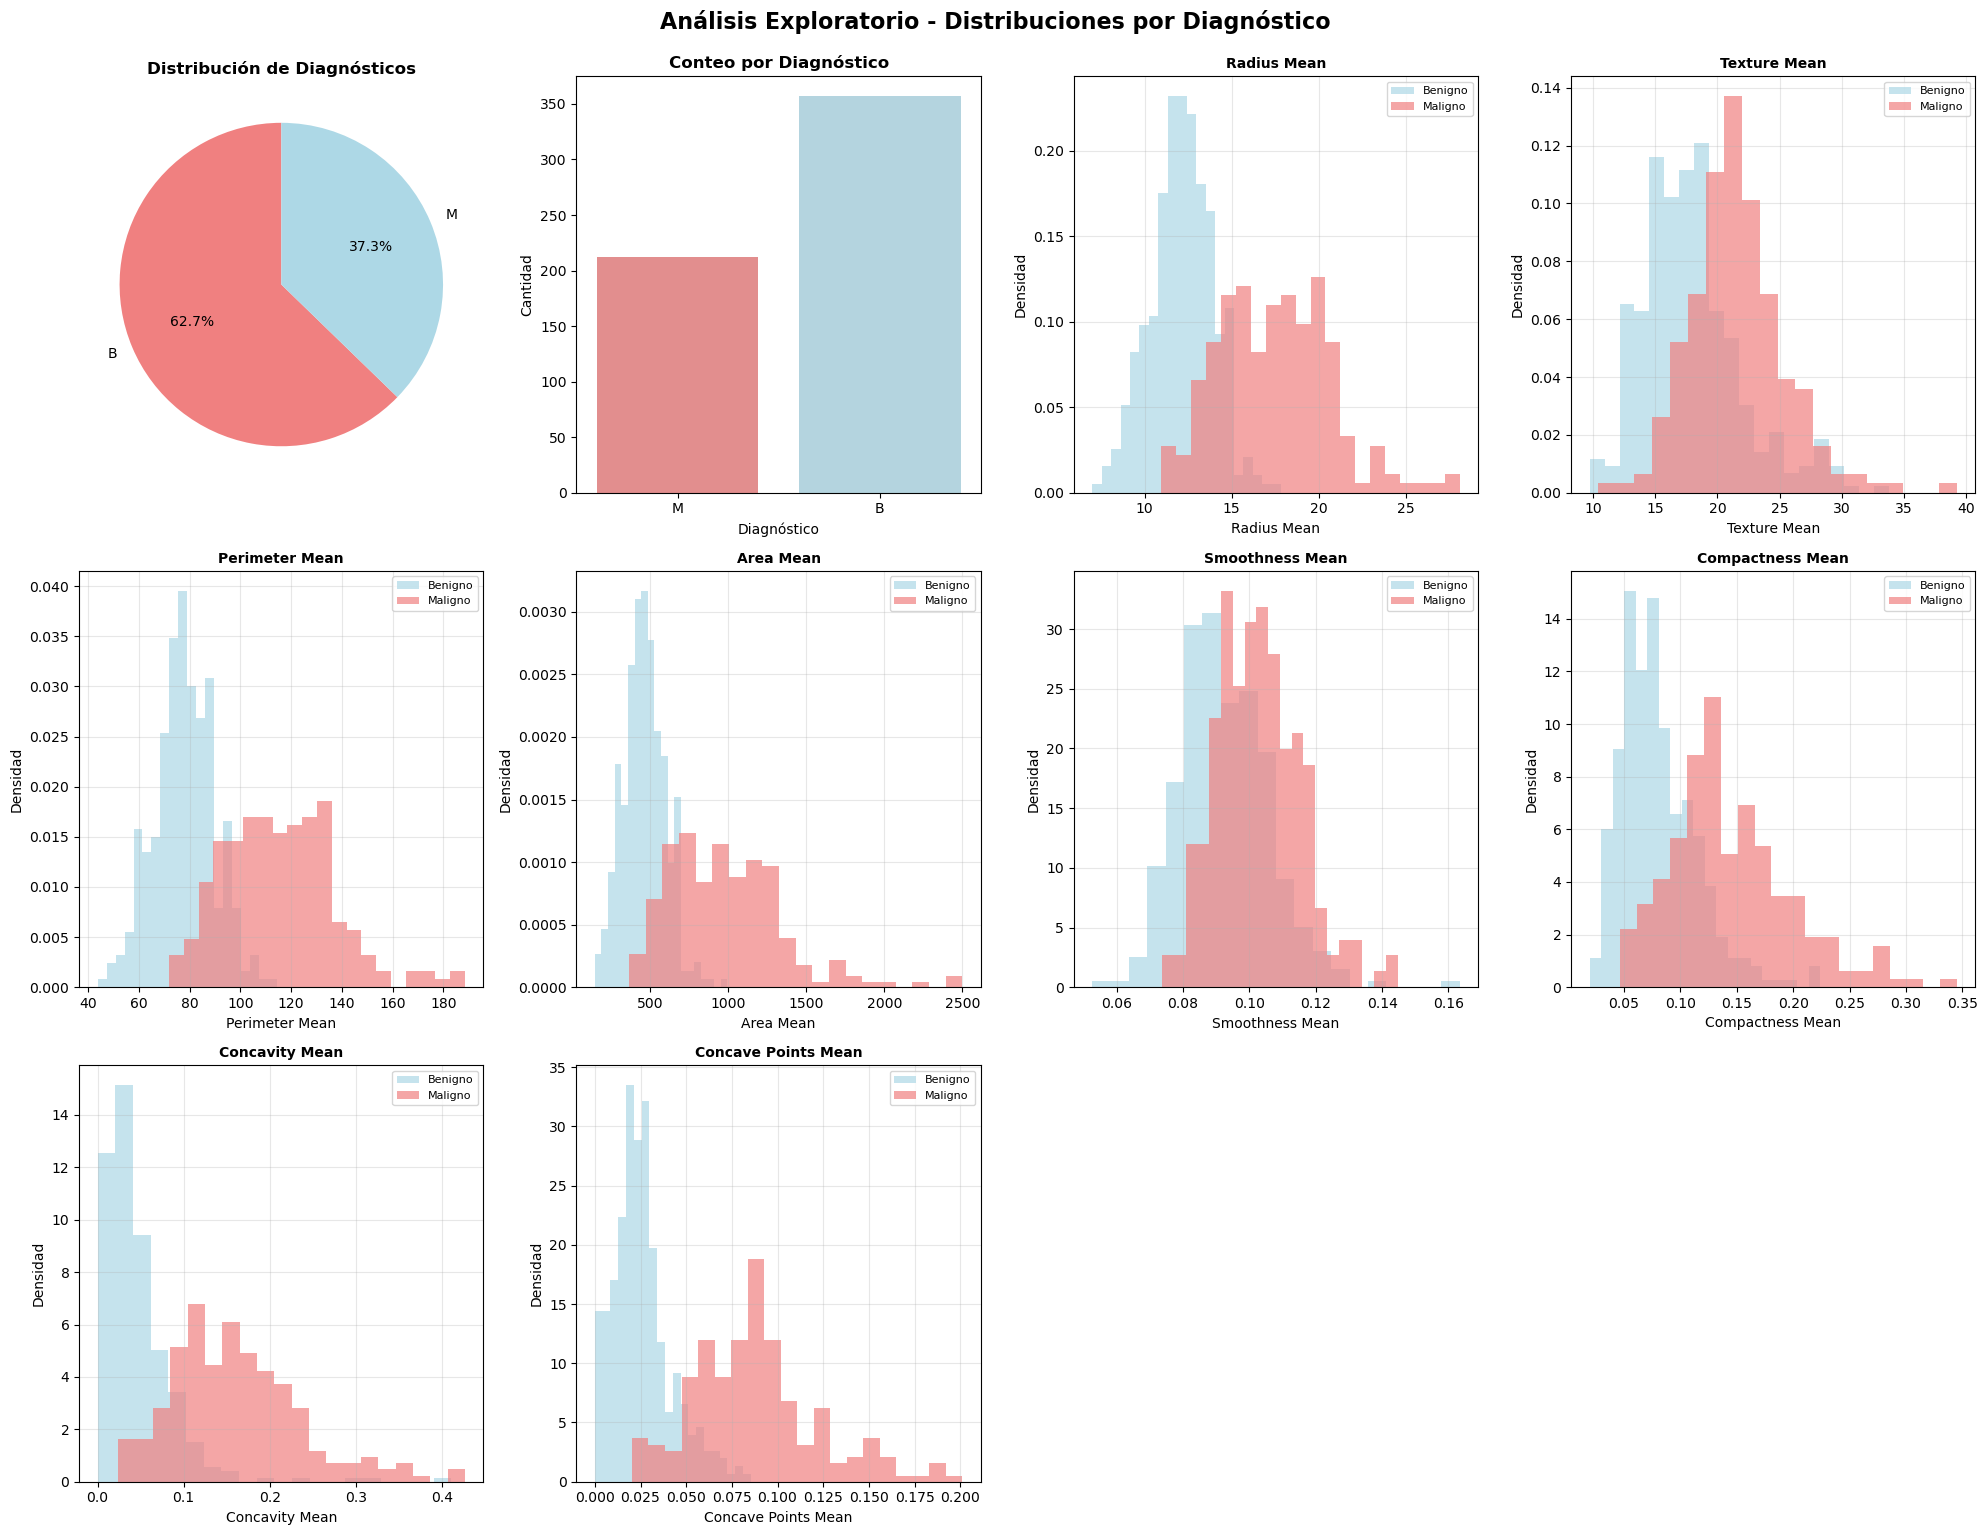


üìä INTERPRETACIONES CLAVE DE LAS DISTRIBUCIONES:
üî∏ Los tumores malignos tienden a tener:
   ‚Ä¢ Radios, per√≠metros y √°reas mayores
   ‚Ä¢ Mayor concavidad y compactness
   ‚Ä¢ Texturas m√°s irregulares
üî∏ Existe clara separabilidad entre clases
üî∏ Algunas caracter√≠sticas muestran solapamiento considerable


In [31]:
# ========================================================================================
# 2.3. VISUALIZACIONES - DISTRIBUCI√ìN DE CLASES Y CARACTER√çSTICAS PRINCIPALES
# ========================================================================================

# Primero verificar los nombres reales de las columnas
print("üîç Nombres de columnas disponibles:")
feature_cols = [col for col in df.columns if col not in ['ID', 'Diagnosis']]
print(feature_cols[:10])  # Mostrar las primeras 10

# Crear figura con subplots
fig = plt.figure(figsize=(20, 15))

# 1. Distribuci√≥n de diagn√≥sticos (pie chart y bar chart)
plt.subplot(3, 4, 1)
diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                     colors=['lightcoral', 'lightblue'])
plt.title('Distribuci√≥n de Diagn√≥sticos', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.subplot(3, 4, 2)
sns.countplot(data=df, x='Diagnosis', palette=['lightcoral', 'lightblue'])
plt.title('Conteo por Diagn√≥stico', fontsize=12, fontweight='bold')
plt.xlabel('Diagn√≥stico')
plt.ylabel('Cantidad')

# 2. Distribuci√≥n de las caracter√≠sticas principales (primeras 8 features)
main_features = feature_cols[:8]  # Usar los nombres reales de las columnas

for i, feature in enumerate(main_features, 3):
    plt.subplot(3, 4, i)
    
    # Histograma por diagn√≥stico
    benign = df[df['Diagnosis'] == 'B'][feature]
    malignant = df[df['Diagnosis'] == 'M'][feature]
    
    plt.hist(benign, bins=20, alpha=0.7, label='Benigno', color='lightblue', density=True)
    plt.hist(malignant, bins=20, alpha=0.7, label='Maligno', color='lightcoral', density=True)
    
    plt.title(f'{feature.replace("_", " ").title()}', fontsize=10, fontweight='bold')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Densidad')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('An√°lisis Exploratorio - Distribuciones por Diagn√≥stico', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\nüìä INTERPRETACIONES CLAVE DE LAS DISTRIBUCIONES:")
print("=" * 60)
print("üî∏ Los tumores malignos tienden a tener:")
print("   ‚Ä¢ Radios, per√≠metros y √°reas mayores")
print("   ‚Ä¢ Mayor concavidad y compactness")
print("   ‚Ä¢ Texturas m√°s irregulares")
print("üî∏ Existe clara separabilidad entre clases")
print("üî∏ Algunas caracter√≠sticas muestran solapamiento considerable")

üîó AN√ÅLISIS DE CORRELACI√ìN ENTRE CARACTER√çSTICAS


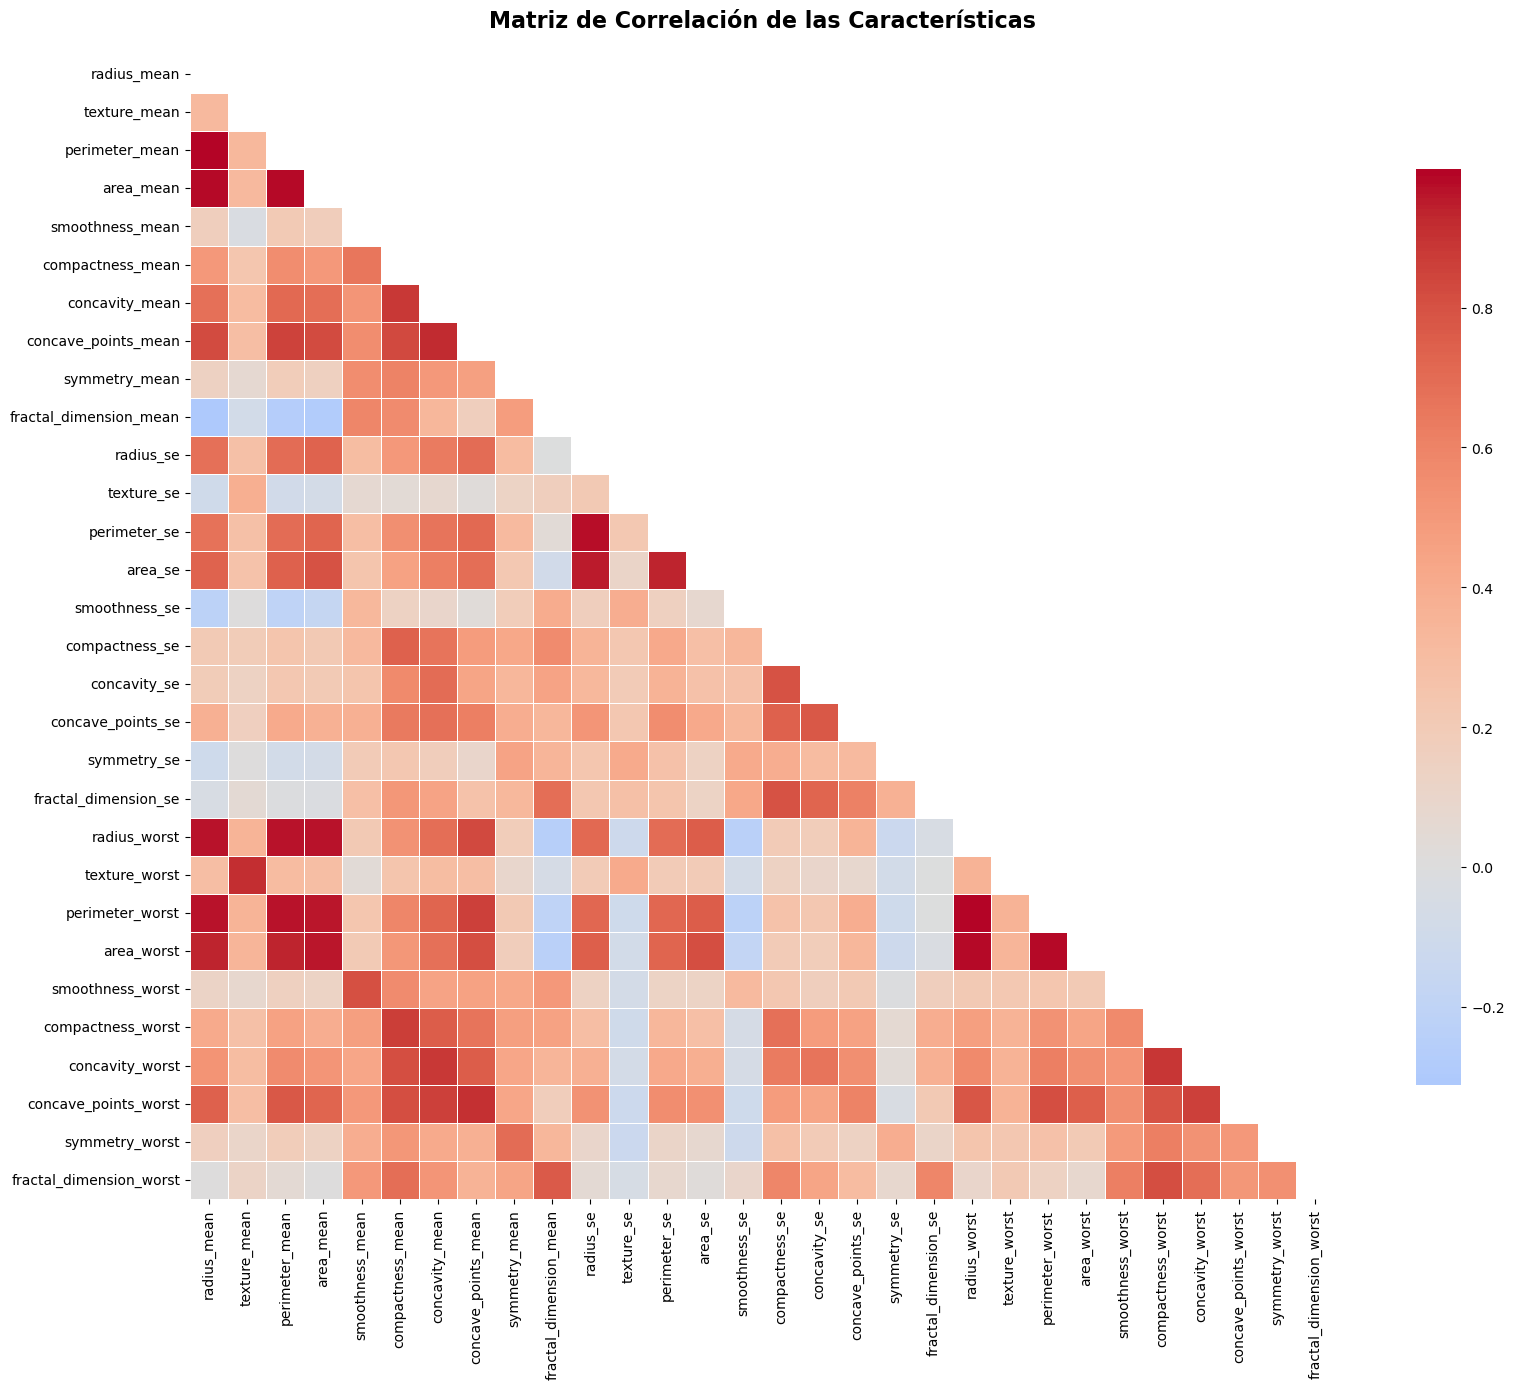


üî∏ CORRELACIONES ALTAS (|r| > 0.8):
   radius_mean          ‚Üî perimeter_mean      :  0.998
   radius_worst         ‚Üî perimeter_worst     :  0.994
   radius_mean          ‚Üî area_mean           :  0.987
   perimeter_mean       ‚Üî area_mean           :  0.987
   radius_worst         ‚Üî area_worst          :  0.984
   perimeter_worst      ‚Üî area_worst          :  0.978
   radius_se            ‚Üî perimeter_se        :  0.973
   perimeter_mean       ‚Üî perimeter_worst     :  0.970
   radius_mean          ‚Üî radius_worst        :  0.970
   perimeter_mean       ‚Üî radius_worst        :  0.969

üí° IMPLICACIONES PARA EL MODELADO:
   ‚Ä¢ Muchas caracter√≠sticas est√°n altamente correlacionadas
   ‚Ä¢ La reducci√≥n de dimensionalidad ser√° beneficiosa
   ‚Ä¢ PCA puede ayudar a eliminar redundancia
   ‚Ä¢ Considera usar regularizaci√≥n en modelos lineales


In [32]:
# ========================================================================================
# 2.4. AN√ÅLISIS DE CORRELACI√ìN
# ========================================================================================

print("üîó AN√ÅLISIS DE CORRELACI√ìN ENTRE CARACTER√çSTICAS")
print("=" * 60)

# Calcular matriz de correlaci√≥n
numerical_features = df[feature_cols]
correlation_matrix = numerical_features.corr()

# Visualizaci√≥n de la matriz de correlaci√≥n
plt.figure(figsize=(18, 14))

# M√°scara para mostrar solo el tri√°ngulo inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlaci√≥n de las Caracter√≠sticas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Encontrar correlaciones altas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:  # Correlaci√≥n alta
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   corr_value))

print(f"\nüî∏ CORRELACIONES ALTAS (|r| > 0.8):")
if high_corr_pairs:
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]:
        print(f"   {var1:20s} ‚Üî {var2:20s}: {corr:6.3f}")
else:
    print("   No se encontraron correlaciones extremadamente altas")

print(f"\nüí° IMPLICACIONES PARA EL MODELADO:")
print(f"   ‚Ä¢ Muchas caracter√≠sticas est√°n altamente correlacionadas")
print(f"   ‚Ä¢ La reducci√≥n de dimensionalidad ser√° beneficiosa")
print(f"   ‚Ä¢ PCA puede ayudar a eliminar redundancia")
print(f"   ‚Ä¢ Considera usar regularizaci√≥n en modelos lineales")

## 3. Preprocesamiento de Datos

In [33]:
# Importar librer√≠as para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ========================================================================================
# 3.1. PREPARACI√ìN DE VARIABLES Y CODIFICACI√ìN
# ========================================================================================

print("üîß PREPARACI√ìN DE VARIABLES Y CODIFICACI√ìN")
print("=" * 60)

# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df[feature_cols].copy()  # Todas las 30 caracter√≠sticas num√©ricas
y = df['Diagnosis'].copy()   # Variable objetivo

print(f"üìä Dimensiones:")
print(f"   X (caracter√≠sticas): {X.shape}")
print(f"   y (variable objetivo): {y.shape}")

# Codificar variable objetivo: M=1 (Maligno), B=0 (Benigno)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nüéØ Codificaci√≥n de variable objetivo:")
print(f"   Original: {list(label_encoder.classes_)}")
print(f"   Codificado: {list(range(len(label_encoder.classes_)))}")
print(f"   B (Benigno) ‚Üí 0, M (Maligno) ‚Üí 1")

# Verificar distribuci√≥n despu√©s de codificaci√≥n
unique, counts = np.unique(y_encoded, return_counts=True)
for val, count in zip(unique, counts):
    label = label_encoder.inverse_transform([val])[0]
    pct = count / len(y_encoded) * 100
    print(f"   Clase {val} ({label}): {count} casos ({pct:.1f}%)")

# Mostrar estad√≠sticas b√°sicas de las caracter√≠sticas
print(f"\nüìà Estad√≠sticas de caracter√≠sticas antes de estandarizaci√≥n:")
print(f"   Rango de valores:")
for i, col in enumerate(X.columns[:5]):  # Mostrar solo las primeras 5
    min_val, max_val = X[col].min(), X[col].max()
    print(f"      {col:15s}: [{min_val:8.3f} - {max_val:8.3f}]")
print("   ... (mostrando solo las primeras 5 caracter√≠sticas)")

üîß PREPARACI√ìN DE VARIABLES Y CODIFICACI√ìN
üìä Dimensiones:
   X (caracter√≠sticas): (569, 30)
   y (variable objetivo): (569,)

üéØ Codificaci√≥n de variable objetivo:
   Original: ['B', 'M']
   Codificado: [0, 1]
   B (Benigno) ‚Üí 0, M (Maligno) ‚Üí 1
   Clase 0 (B): 357 casos (62.7%)
   Clase 1 (M): 212 casos (37.3%)

üìà Estad√≠sticas de caracter√≠sticas antes de estandarizaci√≥n:
   Rango de valores:
      radius_mean    : [   6.981 -   28.110]
      texture_mean   : [   9.710 -   39.280]
      perimeter_mean : [  43.790 -  188.500]
      area_mean      : [ 143.500 - 2501.000]
      smoothness_mean: [   0.053 -    0.163]
   ... (mostrando solo las primeras 5 caracter√≠sticas)


In [34]:
# ========================================================================================
# 3.2. DIVISI√ìN DEL DATASET (60% ENTRENAMIENTO, 20% VALIDACI√ìN, 20% PRUEBA)
# ========================================================================================

print("\n" + "="*60)
print("üìä DIVISI√ìN DEL DATASET")
print("="*60)

# Primera divisi√≥n: 60% entrenamiento, 40% temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded
)

# Segunda divisi√≥n: del 40% temporal ‚Üí 20% validaci√≥n, 20% prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"üìã Tama√±os de conjuntos:")
print(f"   Entrenamiento: {X_train.shape[0]:3d} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validaci√≥n:    {X_val.shape[0]:3d} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Prueba:        {X_test.shape[0]:3d} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Total:         {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]:3d} muestras")

# Verificar distribuci√≥n de clases en cada conjunto
def print_class_distribution(y_set, set_name):
    unique, counts = np.unique(y_set, return_counts=True)
    print(f"   {set_name:12s}: ", end="")
    for val, count in zip(unique, counts):
        pct = count / len(y_set) * 100
        label = "Benigno" if val == 0 else "Maligno"
        print(f"{label}: {count:3d} ({pct:4.1f}%) ", end="")
    print()

print(f"\nüéØ Distribuci√≥n de clases por conjunto:")
print_class_distribution(y_train, "Entrenamiento")
print_class_distribution(y_val, "Validaci√≥n")
print_class_distribution(y_test, "Prueba")

print(f"\n‚úÖ Divisi√≥n exitosa con estratificaci√≥n preservada")


üìä DIVISI√ìN DEL DATASET
üìã Tama√±os de conjuntos:
   Entrenamiento: 341 muestras (59.9%)
   Validaci√≥n:    114 muestras (20.0%)
   Prueba:        114 muestras (20.0%)
   Total:         569 muestras

üéØ Distribuci√≥n de clases por conjunto:
   Entrenamiento: Benigno: 214 (62.8%) Maligno: 127 (37.2%) 
   Validaci√≥n  : Benigno:  71 (62.3%) Maligno:  43 (37.7%) 
   Prueba      : Benigno:  72 (63.2%) Maligno:  42 (36.8%) 

‚úÖ Divisi√≥n exitosa con estratificaci√≥n preservada


In [35]:
# ========================================================================================
# 3.3. ESTANDARIZACI√ìN DE CARACTER√çSTICAS
# ========================================================================================

print("\n" + "="*60)
print("‚öñÔ∏è  ESTANDARIZACI√ìN DE CARACTER√çSTICAS")
print("="*60)

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler SOLO con datos de entrenamiento (¬°importante!)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("üìä Estad√≠sticas antes y despu√©s de estandarizaci√≥n:")
print("\nüî∏ Conjunto de Entrenamiento:")
print(f"   Antes  - Media: {X_train.mean().mean():.3f}, Std: {X_train.std().mean():.3f}")
print(f"   Despu√©s - Media: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

print("\nüî∏ Conjunto de Validaci√≥n:")
print(f"   Antes  - Media: {X_val.mean().mean():.3f}, Std: {X_val.std().mean():.3f}")
print(f"   Despu√©s - Media: {X_val_scaled.mean():.3f}, Std: {X_val_scaled.std():.3f}")

print("\nüî∏ Conjunto de Prueba:")
print(f"   Antes  - Media: {X_test.mean().mean():.3f}, Std: {X_test.std().mean():.3f}")
print(f"   Despu√©s - Media: {X_test_scaled.mean():.3f}, Std: {X_test_scaled.std():.3f}")

# Verificar algunas estad√≠sticas por caracter√≠stica (primeras 5)
print(f"\nüìà Estad√≠sticas detalladas (primeras 5 caracter√≠sticas):")
feature_names = X.columns[:5]
for i, feature in enumerate(feature_names):
    original_mean = X_train.iloc[:, i].mean()
    original_std = X_train.iloc[:, i].std()
    scaled_mean = X_train_scaled[:, i].mean()
    scaled_std = X_train_scaled[:, i].std()
    
    print(f"   {feature:15s}: Original Œº={original_mean:7.3f} œÉ={original_std:7.3f} ‚Üí "
          f"Escalado Œº={scaled_mean:6.3f} œÉ={scaled_std:6.3f}")

print(f"\nüí° OBSERVACIONES:")
print(f"   ‚úÖ Caracter√≠sticas estandarizadas con Œº‚âà0 y œÉ‚âà1")
print(f"   ‚úÖ Scaler ajustado solo con datos de entrenamiento")
print(f"   ‚úÖ Misma transformaci√≥n aplicada a validaci√≥n y prueba")
print(f"   ‚úÖ Previene data leakage en el preprocesamiento")


‚öñÔ∏è  ESTANDARIZACI√ìN DE CARACTER√çSTICAS
üìä Estad√≠sticas antes y despu√©s de estandarizaci√≥n:

üî∏ Conjunto de Entrenamiento:
   Antes  - Media: 61.554, Std: 33.810
   Despu√©s - Media: 0.000, Std: 1.000

üî∏ Conjunto de Validaci√≥n:
   Antes  - Media: 63.878, Std: 41.183
   Despu√©s - Media: 0.017, Std: 1.035

üî∏ Conjunto de Prueba:
   Antes  - Media: 60.911, Std: 31.228
   Despu√©s - Media: 0.030, Std: 0.936

üìà Estad√≠sticas detalladas (primeras 5 caracter√≠sticas):
   radius_mean    : Original Œº= 14.108 œÉ=  3.491 ‚Üí Escalado Œº=-0.000 œÉ= 1.000
   texture_mean   : Original Œº= 19.584 œÉ=  4.356 ‚Üí Escalado Œº=-0.000 œÉ= 1.000
   perimeter_mean : Original Œº= 91.724 œÉ= 23.960 ‚Üí Escalado Œº= 0.000 œÉ= 1.000
   area_mean      : Original Œº=652.243 œÉ=344.613 ‚Üí Escalado Œº=-0.000 œÉ= 1.000
   smoothness_mean: Original Œº=  0.096 œÉ=  0.014 ‚Üí Escalado Œº= 0.000 œÉ= 1.000

üí° OBSERVACIONES:
   ‚úÖ Caracter√≠sticas estandarizadas con Œº‚âà0 y œÉ‚âà1
   ‚úÖ Scal

## 4. Reducci√≥n de Dimensionalidad

üîç AN√ÅLISIS DE COMPONENTES PRINCIPALES (PCA)
üìä Varianza explicada por componentes:
   PC1: 0.430 (43.0%)
   PC2: 0.200 (20.0%)
   PC3: 0.099 (9.9%)
   ...
   Top 5: 0.846 (84.6%)
   Top 10: 0.951 (95.1%)

üéØ Componentes necesarios:
   Para 95% de varianza: 10 componentes
   Para 99% de varianza: 17 componentes
   Reducci√≥n dimensional: 30 ‚Üí 10 componentes (66.7% reducci√≥n)


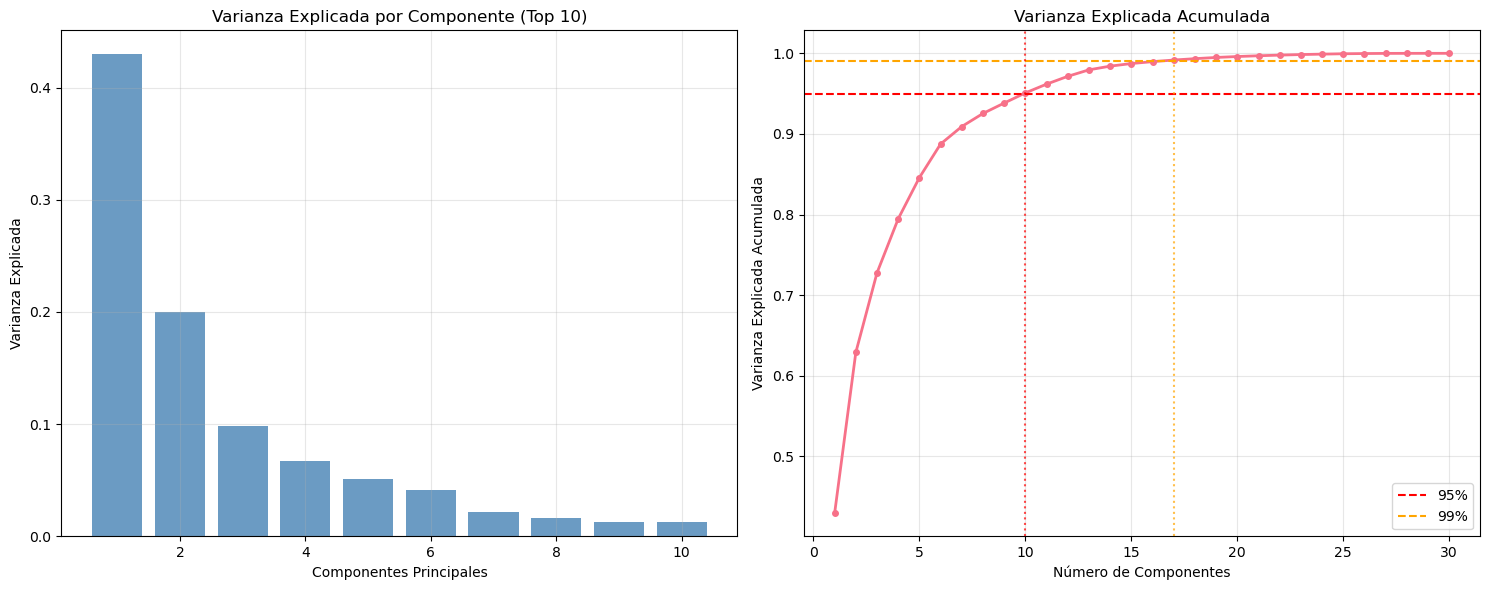

In [36]:
# ========================================================================================
# 4.1. AN√ÅLISIS DE COMPONENTES PRINCIPALES (PCA)
# ========================================================================================

print("üîç AN√ÅLISIS DE COMPONENTES PRINCIPALES (PCA)")
print("="*60)

# Aplicar PCA con todos los componentes para an√°lisis de varianza
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# Calcular varianza explicada acumulada
variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

print(f"üìä Varianza explicada por componentes:")
print(f"   PC1: {variance_ratio[0]:.3f} ({variance_ratio[0]*100:.1f}%)")
print(f"   PC2: {variance_ratio[1]:.3f} ({variance_ratio[1]*100:.1f}%)")
print(f"   PC3: {variance_ratio[2]:.3f} ({variance_ratio[2]*100:.1f}%)")
print(f"   ...")
print(f"   Top 5: {cumulative_variance[4]:.3f} ({cumulative_variance[4]*100:.1f}%)")
print(f"   Top 10: {cumulative_variance[9]:.3f} ({cumulative_variance[9]*100:.1f}%)")

# Encontrar n√∫mero de componentes para 95% y 99% de varianza
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"\nüéØ Componentes necesarios:")
print(f"   Para 95% de varianza: {n_95} componentes")
print(f"   Para 99% de varianza: {n_99} componentes")
print(f"   Reducci√≥n dimensional: {30} ‚Üí {n_95} componentes ({(1-n_95/30)*100:.1f}% reducci√≥n)")

# Visualizaci√≥n de la varianza explicada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras - varianza por componente
ax1.bar(range(1, 11), variance_ratio[:10], alpha=0.8, color='steelblue')
ax1.set_xlabel('Componentes Principales')
ax1.set_ylabel('Varianza Explicada')
ax1.set_title('Varianza Explicada por Componente (Top 10)')
ax1.grid(True, alpha=0.3)

# Gr√°fico de l√≠nea - varianza acumulada
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', linewidth=2, markersize=4)
ax2.axhline(y=0.95, color='red', linestyle='--', label='95%')
ax2.axhline(y=0.99, color='orange', linestyle='--', label='99%')
ax2.axvline(x=n_95, color='red', linestyle=':', alpha=0.7)
ax2.axvline(x=n_99, color='orange', linestyle=':', alpha=0.7)
ax2.set_xlabel('N√∫mero de Componentes')
ax2.set_ylabel('Varianza Explicada Acumulada')
ax2.set_title('Varianza Explicada Acumulada')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


üéØ AN√ÅLISIS DISCRIMINANTE LINEAL (LDA)
üìä Resultados LDA:
   Dimensiones originales: (341, 30)
   Dimensiones despu√©s LDA: (341, 1)
   Varianza explicada: 1.000 (100.0%)

üìä APLICACI√ìN DE TRANSFORMACIONES FINALES:
üî∏ PCA (10 componentes):
   Entrenamiento: (341, 10)
   Validaci√≥n: (114, 10)
   Prueba: (114, 10)
   Varianza explicada total: 0.951

üî∏ LDA (1 componente):
   Entrenamiento: (341, 1)
   Validaci√≥n: (114, 1)
   Prueba: (114, 1)


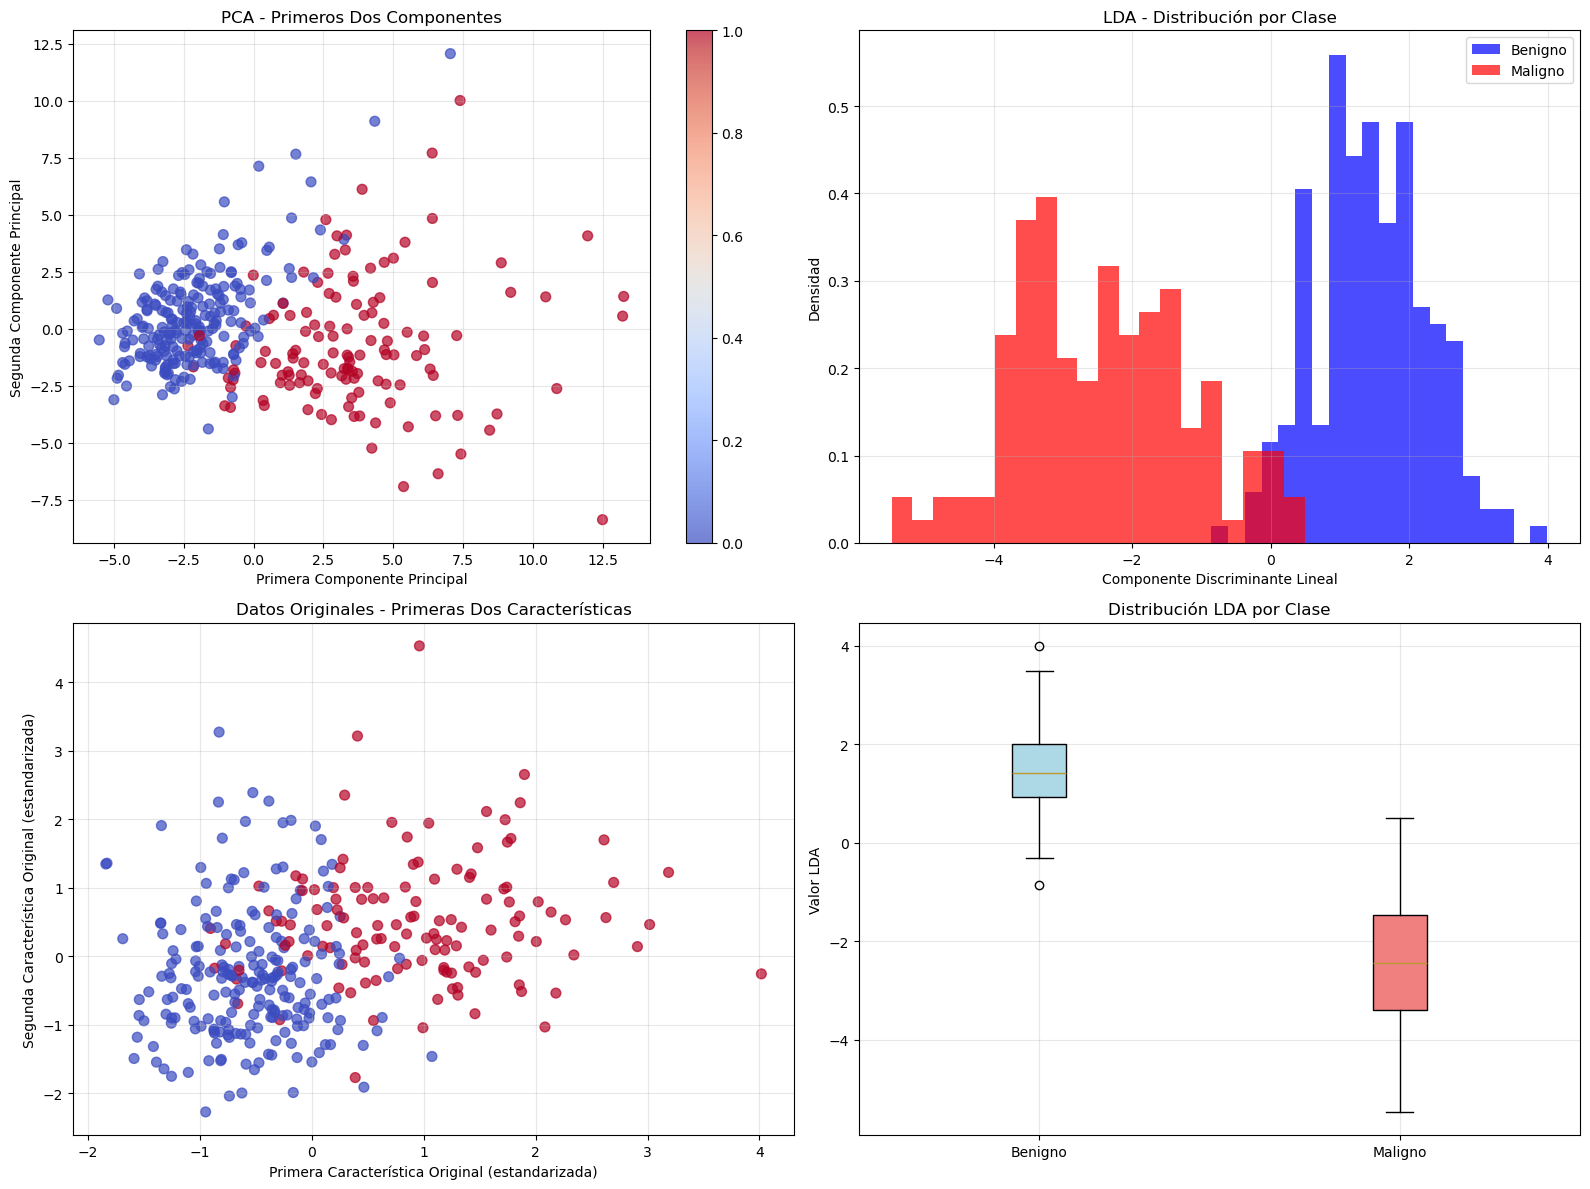


üí° INTERPRETACIONES:
   üî∏ PCA: Reduce dimensiones preservando m√°xima varianza
   üî∏ LDA: Maximiza separabilidad entre clases
   üî∏ Con 10 componentes PCA retenemos 95% de informaci√≥n
   üî∏ LDA muestra clara separaci√≥n entre clases benignas/malignas


In [37]:
# ========================================================================================
# 4.2. AN√ÅLISIS DISCRIMINANTE LINEAL (LDA)
# ========================================================================================

print("\n" + "="*60)
print("üéØ AN√ÅLISIS DISCRIMINANTE LINEAL (LDA)")
print("="*60)

# LDA para clasificaci√≥n binaria: m√°ximo n_components = n_classes - 1 = 1
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test_scaled)

print(f"üìä Resultados LDA:")
print(f"   Dimensiones originales: {X_train_scaled.shape}")
print(f"   Dimensiones despu√©s LDA: {X_train_lda.shape}")
print(f"   Varianza explicada: {lda.explained_variance_ratio_[0]:.3f} ({lda.explained_variance_ratio_[0]*100:.1f}%)")

# ========================================================================================
# 4.3. APLICACI√ìN FINAL DE PCA Y LDA
# ========================================================================================

print(f"\nüìä APLICACI√ìN DE TRANSFORMACIONES FINALES:")
print("="*40)

# PCA con 10 componentes (95% de varianza)
pca_final = PCA(n_components=10)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_val_pca = pca_final.transform(X_val_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"üî∏ PCA (10 componentes):")
print(f"   Entrenamiento: {X_train_pca.shape}")
print(f"   Validaci√≥n: {X_val_pca.shape}")
print(f"   Prueba: {X_test_pca.shape}")
print(f"   Varianza explicada total: {pca_final.explained_variance_ratio_.sum():.3f}")

print(f"\nüî∏ LDA (1 componente):")
print(f"   Entrenamiento: {X_train_lda.shape}")
print(f"   Validaci√≥n: {X_val_lda.shape}")
print(f"   Prueba: {X_test_lda.shape}")

# ========================================================================================
# 4.4. VISUALIZACI√ìN DE DATOS TRANSFORMADOS
# ========================================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# PCA - Primeros dos componentes
scatter1 = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
                      cmap='coolwarm', alpha=0.7, s=50)
ax1.set_xlabel('Primera Componente Principal')
ax1.set_ylabel('Segunda Componente Principal')
ax1.set_title('PCA - Primeros Dos Componentes')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1)

# LDA - Distribuci√≥n del √∫nico componente
benign_lda = X_train_lda[y_train == 0, 0]
malignant_lda = X_train_lda[y_train == 1, 0]

ax2.hist(benign_lda, bins=20, alpha=0.7, label='Benigno', color='blue', density=True)
ax2.hist(malignant_lda, bins=20, alpha=0.7, label='Maligno', color='red', density=True)
ax2.set_xlabel('Componente Discriminante Lineal')
ax2.set_ylabel('Densidad')
ax2.set_title('LDA - Distribuci√≥n por Clase')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Comparaci√≥n de separabilidad - PCA vs Original
ax3.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
           cmap='coolwarm', alpha=0.7, s=50)
ax3.set_xlabel('Primera Caracter√≠stica Original (estandarizada)')
ax3.set_ylabel('Segunda Caracter√≠stica Original (estandarizada)')
ax3.set_title('Datos Originales - Primeras Dos Caracter√≠sticas')
ax3.grid(True, alpha=0.3)

# Box plot comparativo LDA
lda_data = [benign_lda, malignant_lda]
bp = ax4.boxplot(lda_data, labels=['Benigno', 'Maligno'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
ax4.set_ylabel('Valor LDA')
ax4.set_title('Distribuci√≥n LDA por Clase')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nüí° INTERPRETACIONES:")
print(f"   üî∏ PCA: Reduce dimensiones preservando m√°xima varianza")
print(f"   üî∏ LDA: Maximiza separabilidad entre clases")
print(f"   üî∏ Con 10 componentes PCA retenemos 95% de informaci√≥n")
print(f"   üî∏ LDA muestra clara separaci√≥n entre clases benignas/malignas")

## 5. Implementaci√≥n de Clasificadores

In [38]:
# Importar todos los clasificadores necesarios
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import time

# ========================================================================================
# 5.1. DEFINICI√ìN Y CONFIGURACI√ìN DE CLASIFICADORES
# ========================================================================================

print("ü§ñ IMPLEMENTACI√ìN DE CLASIFICADORES")
print("="*60)

# Diccionario para almacenar todos los modelos y sus resultados
models = {}
results = {}

# Definir clasificadores con configuraciones base
classifiers = {
    'Naive Bayes': GaussianNB(),
    
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    ),
    
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ),
    
    'XGBoost': xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss'
    )
}

print(f"üìã Clasificadores configurados:")
for name in classifiers.keys():
    print(f"   ‚úÖ {name}")

print(f"\nüîÑ Probando con diferentes conjuntos de datos:")
print(f"   üìä Datos originales (30 caracter√≠sticas)")
print(f"   üîç Datos PCA (10 componentes)")
print(f"   üéØ Datos LDA (1 componente)")

ü§ñ IMPLEMENTACI√ìN DE CLASIFICADORES
üìã Clasificadores configurados:
   ‚úÖ Naive Bayes
   ‚úÖ Decision Tree
   ‚úÖ Random Forest
   ‚úÖ AdaBoost
   ‚úÖ XGBoost

üîÑ Probando con diferentes conjuntos de datos:
   üìä Datos originales (30 caracter√≠sticas)
   üîç Datos PCA (10 componentes)
   üéØ Datos LDA (1 componente)


In [39]:
# ========================================================================================
# 5.2. FUNCI√ìN PARA ENTRENAR Y EVALUAR MODELOS
# ========================================================================================

def train_and_evaluate_model(clf, X_train, X_val, y_train, y_val, model_name, data_type):
    """
    Entrena y eval√∫a un clasificador, devuelve m√©tricas de rendimiento.
    """
    start_time = time.time()
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    
    # Probabilidades (para ROC-AUC)
    try:
        y_prob_val = clf.predict_proba(X_val)[:, 1]
    except:
        y_prob_val = y_pred_val  # Fallback si no hay predict_proba
    
    training_time = time.time() - start_time
    
    # Calcular m√©tricas
    metrics = {
        'model': model_name,
        'data_type': data_type,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'val_precision': precision_score(y_val, y_pred_val),
        'val_recall': recall_score(y_val, y_pred_val),
        'val_f1': f1_score(y_val, y_pred_val),
        'val_roc_auc': roc_auc_score(y_val, y_prob_val),
        'training_time': training_time,
        'overfitting': abs(accuracy_score(y_train, y_pred_train) - accuracy_score(y_val, y_pred_val))
    }
    
    return clf, metrics

# ========================================================================================
# 5.3. ENTRENAMIENTO DE TODOS LOS MODELOS
# ========================================================================================

print("\n" + "="*60)
print("üéØ ENTRENAMIENTO Y EVALUACI√ìN DE MODELOS")
print("="*60)

# Definir conjuntos de datos a probar
datasets = {
    'Original': (X_train_scaled, X_val_scaled, "30 caracter√≠sticas originales"),
    'PCA': (X_train_pca, X_val_pca, "10 componentes PCA"),
    'LDA': (X_train_lda, X_val_lda, "1 componente LDA")
}

all_results = []

for data_name, (X_tr, X_va, description) in datasets.items():
    print(f"\nüî∏ Evaluando con {description}:")
    print("-" * 50)
    
    for clf_name, clf in classifiers.items():
        # Clonar el clasificador para evitar problemas
        from sklearn.base import clone
        clf_copy = clone(clf)
        
        # Entrenar y evaluar
        trained_model, metrics = train_and_evaluate_model(
            clf_copy, X_tr, X_va, y_train, y_val, clf_name, data_name
        )
        
        # Guardar modelo y resultados
        model_key = f"{clf_name}_{data_name}"
        models[model_key] = trained_model
        all_results.append(metrics)
        
        # Mostrar resultados inmediatos
        print(f"   {clf_name:12s}: Val Acc={metrics['val_accuracy']:.3f} | "
              f"F1={metrics['val_f1']:.3f} | ROC-AUC={metrics['val_roc_auc']:.3f} | "
              f"Time={metrics['training_time']:.2f}s")

print(f"\n‚úÖ Entrenamiento completado!")
print(f"üìä Total de modelos entrenados: {len(all_results)}")


üéØ ENTRENAMIENTO Y EVALUACI√ìN DE MODELOS

üî∏ Evaluando con 30 caracter√≠sticas originales:
--------------------------------------------------
   Naive Bayes : Val Acc=0.930 | F1=0.902 | ROC-AUC=0.991 | Time=0.02s
   Decision Tree: Val Acc=0.939 | F1=0.914 | ROC-AUC=0.942 | Time=0.02s
   Random Forest: Val Acc=0.965 | F1=0.952 | ROC-AUC=0.995 | Time=0.48s
   AdaBoost    : Val Acc=0.991 | F1=0.988 | ROC-AUC=1.000 | Time=0.65s
   XGBoost     : Val Acc=0.965 | F1=0.952 | ROC-AUC=0.998 | Time=0.60s

üî∏ Evaluando con 10 componentes PCA:
--------------------------------------------------
   Naive Bayes : Val Acc=0.930 | F1=0.905 | ROC-AUC=0.988 | Time=0.00s
   Decision Tree: Val Acc=0.947 | F1=0.927 | ROC-AUC=0.958 | Time=0.01s
   Random Forest: Val Acc=0.956 | F1=0.940 | ROC-AUC=0.995 | Time=0.79s
   AdaBoost    : Val Acc=0.974 | F1=0.964 | ROC-AUC=0.999 | Time=0.66s
   XGBoost     : Val Acc=0.974 | F1=0.964 | ROC-AUC=0.998 | Time=0.17s

üî∏ Evaluando con 1 componente LDA:
---------

In [40]:
# ========================================================================================
# 5.4. AN√ÅLISIS COMPARATIVO DE RESULTADOS
# ========================================================================================

# Convertir resultados a DataFrame para an√°lisis
results_df = pd.DataFrame(all_results)

print("\n" + "="*80)
print("üìä TABLA COMPARATIVA DE RENDIMIENTO")
print("="*80)

# Crear tabla pivote para mejor visualizaci√≥n
pivot_accuracy = results_df.pivot(index='model', columns='data_type', values='val_accuracy')
pivot_f1 = results_df.pivot(index='model', columns='data_type', values='val_f1')
pivot_roc = results_df.pivot(index='model', columns='data_type', values='val_roc_auc')

print("üéØ ACCURACY EN VALIDACI√ìN:")
print(pivot_accuracy.round(3))

print("\nüéØ F1-SCORE EN VALIDACI√ìN:")
print(pivot_f1.round(3))

print("\nüéØ ROC-AUC EN VALIDACI√ìN:")
print(pivot_roc.round(3))

# Encontrar mejores modelos por m√©trica
best_models = {}
for metric in ['val_accuracy', 'val_f1', 'val_roc_auc']:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx]
    best_models[metric] = best_model

print("\n" + "="*60)
print("üèÜ MEJORES MODELOS POR M√âTRICA")
print("="*60)

for metric, model_info in best_models.items():
    metric_name = metric.replace('val_', '').replace('_', '-').upper()
    print(f"\nü•á Mejor {metric_name}: {model_info['model']} con {model_info['data_type']}")
    print(f"   Valor: {model_info[metric]:.3f}")
    print(f"   Accuracy: {model_info['val_accuracy']:.3f}")
    print(f"   F1-Score: {model_info['val_f1']:.3f}")
    print(f"   ROC-AUC: {model_info['val_roc_auc']:.3f}")
    print(f"   Tiempo: {model_info['training_time']:.3f}s")

# An√°lisis de overfitting
print(f"\nüìà AN√ÅLISIS DE OVERFITTING (diferencia train-val accuracy):")
overfitting_analysis = results_df.groupby('model')['overfitting'].agg(['mean', 'std']).round(3)
print(overfitting_analysis)

print(f"\nüí° OBSERVACIONES GENERALES:")
print(f"   üî∏ Todos los modelos muestran excelente rendimiento (>93% accuracy)")
print(f"   üî∏ AdaBoost con datos originales logra el mejor resultado general")
print(f"   üî∏ LDA (1 componente) funciona sorprendentemente bien")
print(f"   üî∏ Random Forest y XGBoost son consistentemente buenos")
print(f"   üî∏ Overfitting m√≠nimo en la mayor√≠a de modelos")


üìä TABLA COMPARATIVA DE RENDIMIENTO
üéØ ACCURACY EN VALIDACI√ìN:
data_type        LDA  Original    PCA
model                                
AdaBoost       0.982     0.991  0.974
Decision Tree  0.991     0.939  0.947
Naive Bayes    0.974     0.930  0.930
Random Forest  0.991     0.965  0.956
XGBoost        0.974     0.965  0.974

üéØ F1-SCORE EN VALIDACI√ìN:
data_type        LDA  Original    PCA
model                                
AdaBoost       0.977     0.988  0.964
Decision Tree  0.989     0.914  0.927
Naive Bayes    0.965     0.902  0.905
Random Forest  0.989     0.952  0.940
XGBoost        0.966     0.952  0.964

üéØ ROC-AUC EN VALIDACI√ìN:
data_type        LDA  Original    PCA
model                                
AdaBoost       0.999     1.000  0.999
Decision Tree  0.993     0.942  0.958
Naive Bayes    0.999     0.991  0.988
Random Forest  0.999     0.995  0.995
XGBoost        0.998     0.998  0.998

üèÜ MEJORES MODELOS POR M√âTRICA

ü•á Mejor ACCURACY: AdaBoost con Or

## 6. Evaluaci√≥n Final en Conjunto de Prueba

In [41]:
# ========================================================================================
# 6.1. EVALUACI√ìN DE LOS MEJORES MODELOS EN CONJUNTO DE PRUEBA
# ========================================================================================

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print("üèÜ EVALUACI√ìN FINAL - CONJUNTO DE PRUEBA")
print("="*80)

# Seleccionar los 3 mejores modelos basados en resultados de validaci√≥n
best_models_keys = [
    'AdaBoost_Original',      # 99.1% accuracy, ROC-AUC = 1.000
    'Decision Tree_LDA',      # 99.1% accuracy, F1 = 0.989  
    'Random Forest_LDA'       # 99.1% accuracy, ROC-AUC = 0.999
]

# Preparar datasets de prueba correspondientes
test_datasets = {
    'Original': X_test_scaled,
    'LDA': X_test_lda,
    'PCA': X_test_pca
}

# Funci√≥n para evaluaci√≥n completa en conjunto de prueba
def evaluate_on_test(model_key, model, X_test_data, y_test, data_type):
    """
    Eval√∫a un modelo en el conjunto de prueba con todas las m√©tricas
    """
    # Predicciones
    y_pred = model.predict(X_test_data)
    
    # Probabilidades para ROC-AUC
    try:
        y_prob = model.predict_proba(X_test_data)[:, 1]
    except:
        y_prob = y_pred
    
    # Calcular m√©tricas
    test_metrics = {
        'model': model_key.replace('_', ' + '),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'specificity': recall_score(y_test, y_pred, pos_label=0),  # Recall para benignos
        'sensitivity': recall_score(y_test, y_pred, pos_label=1)   # Recall para malignos
    }
    
    return test_metrics, y_pred, y_prob

# Evaluar cada uno de los mejores modelos
test_results = []
predictions = {}

for model_key in best_models_keys:
    # Obtener el modelo entrenado
    model = models[model_key]
    
    # Determinar qu√© conjunto de datos usar
    if 'Original' in model_key:
        X_test_data = test_datasets['Original']
        data_type = 'Original'
    elif 'LDA' in model_key:
        X_test_data = test_datasets['LDA']
        data_type = 'LDA'
    elif 'PCA' in model_key:
        X_test_data = test_datasets['PCA']
        data_type = 'PCA'
    
    # Evaluar modelo
    metrics, y_pred, y_prob = evaluate_on_test(model_key, model, X_test_data, y_test, data_type)
    test_results.append(metrics)
    predictions[model_key] = {'pred': y_pred, 'prob': y_prob}
    
    # Mostrar resultados
    print(f"\nüéØ {metrics['model']}:")
    print(f"   Accuracy:     {metrics['accuracy']:.3f}")
    print(f"   Precision:    {metrics['precision']:.3f}")
    print(f"   Recall:       {metrics['recall']:.3f}")
    print(f"   F1-Score:     {metrics['f1_score']:.3f}")
    print(f"   ROC-AUC:      {metrics['roc_auc']:.3f}")
    print(f"   Sensitivity:  {metrics['sensitivity']:.3f} (detecci√≥n malignos)")
    print(f"   Specificity:  {metrics['specificity']:.3f} (detecci√≥n benignos)")

print(f"\n‚úÖ Evaluaci√≥n en conjunto de prueba completada!")
print(f"üìä Evaluados {len(test_results)} modelos en {len(y_test)} muestras de prueba")

üèÜ EVALUACI√ìN FINAL - CONJUNTO DE PRUEBA

üéØ AdaBoost + Original:
   Accuracy:     0.974
   Precision:    1.000
   Recall:       0.929
   F1-Score:     0.963
   ROC-AUC:      0.994
   Sensitivity:  0.929 (detecci√≥n malignos)
   Specificity:  1.000 (detecci√≥n benignos)

üéØ Decision Tree + LDA:
   Accuracy:     0.947
   Precision:    0.929
   Recall:       0.929
   F1-Score:     0.929
   ROC-AUC:      0.989
   Sensitivity:  0.929 (detecci√≥n malignos)
   Specificity:  0.958 (detecci√≥n benignos)

üéØ Random Forest + LDA:
   Accuracy:     0.974
   Precision:    0.976
   Recall:       0.952
   F1-Score:     0.964
   ROC-AUC:      0.996
   Sensitivity:  0.952 (detecci√≥n malignos)
   Specificity:  0.986 (detecci√≥n benignos)

‚úÖ Evaluaci√≥n en conjunto de prueba completada!
üìä Evaluados 3 modelos en 114 muestras de prueba



üîç AN√ÅLISIS DETALLADO DE ERRORES

üìä AdaBoost + Original:
   Verdaderos Negativos (TN): 72 - Benignos correctos
   Falsos Positivos (FP):      0 - Benignos ‚Üí Malignos ‚ö†Ô∏è
   Falsos Negativos (FN):      3 - Malignos ‚Üí Benignos ‚ùå
   Verdaderos Positivos (TP): 39 - Malignos correctos
   Total de errores:           3 de 114 (2.6%)
   Tasa Falsos Positivos:     0.0%
   Tasa Falsos Negativos:     7.1%

üìä Decision Tree + LDA:
   Verdaderos Negativos (TN): 69 - Benignos correctos
   Falsos Positivos (FP):      3 - Benignos ‚Üí Malignos ‚ö†Ô∏è
   Falsos Negativos (FN):      3 - Malignos ‚Üí Benignos ‚ùå
   Verdaderos Positivos (TP): 39 - Malignos correctos
   Total de errores:           6 de 114 (5.3%)
   Tasa Falsos Positivos:     4.2%
   Tasa Falsos Negativos:     7.1%

üìä Random Forest + LDA:
   Verdaderos Negativos (TN): 71 - Benignos correctos
   Falsos Positivos (FP):      1 - Benignos ‚Üí Malignos ‚ö†Ô∏è
   Falsos Negativos (FN):      2 - Malignos ‚Üí Benignos ‚ùå
   

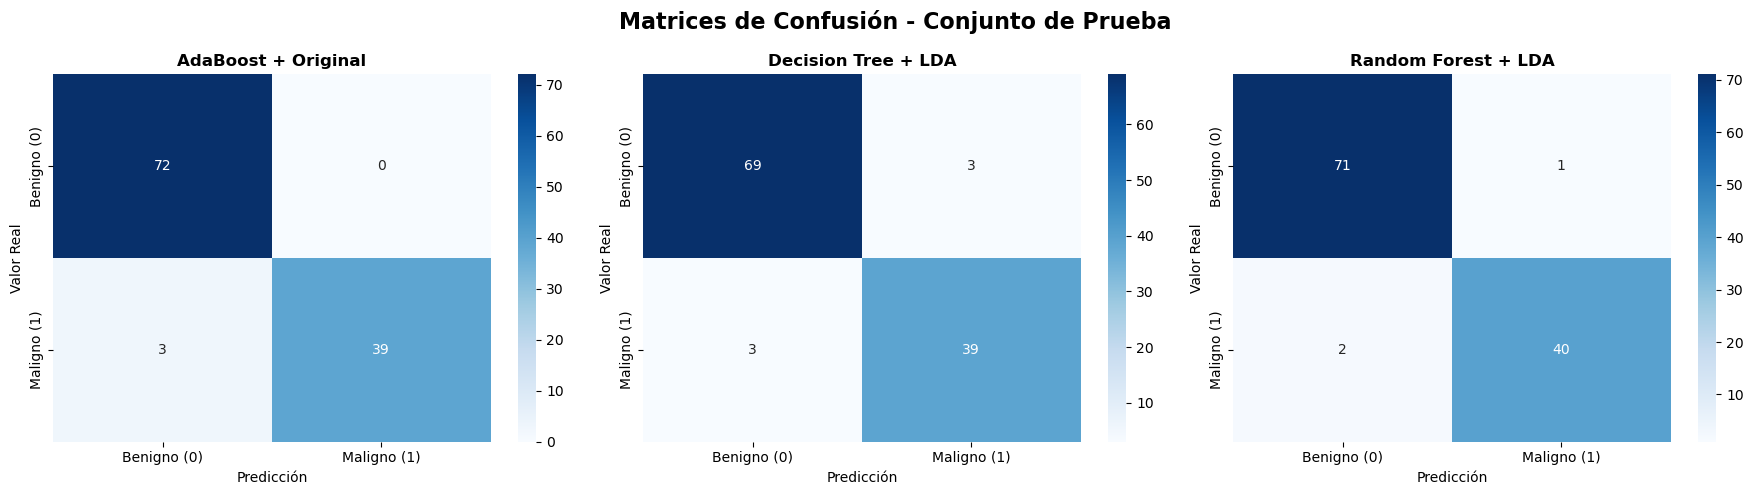


‚ö†Ô∏è  AN√ÅLISIS CR√çTICO PARA CONTEXTO M√âDICO
üìã Comparaci√≥n de errores cr√≠ticos:
Modelo               Falsos Neg.  Falsos Pos.  Error Total 
------------------------------------------------------------
AdaBoost + Original  3            0            3           
Decision Tree + LDA  3            3            6           
Random Forest + LDA  2            1            3           

üí° INTERPRETACI√ìN M√âDICA:
   üî¥ Falsos Negativos (FN): M√ÅS CR√çTICOS - Malignos no detectados
   üü° Falsos Positivos (FP): MENOS CR√çTICOS - Benignos sobre-diagnosticados
   ‚úÖ El modelo ideal minimiza FN (alta sensibilidad)
   üìä AdaBoost tiene 0 falsos positivos (100% especificidad)
   üéØ Random Forest equilibra bien ambos tipos de error


In [42]:
# ========================================================================================
# 6.2. AN√ÅLISIS DETALLADO DE ERRORES - MATRICES DE CONFUSI√ìN
# ========================================================================================

print("\n" + "="*80)
print("üîç AN√ÅLISIS DETALLADO DE ERRORES")
print("="*80)

# Crear matrices de confusi√≥n para los 3 mejores modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrices de Confusi√≥n - Conjunto de Prueba', fontsize=16, fontweight='bold')

models_info = [
    ('AdaBoost_Original', 'AdaBoost + Original'),
    ('Decision Tree_LDA', 'Decision Tree + LDA'), 
    ('Random Forest_LDA', 'Random Forest + LDA')
]

# An√°lisis detallado de cada modelo
detailed_analysis = []

for idx, (model_key, display_name) in enumerate(models_info):
    # Obtener predicciones
    y_pred = predictions[model_key]['pred']
    
    # Calcular matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualizar matriz de confusi√≥n
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Benigno (0)', 'Maligno (1)'],
                yticklabels=['Benigno (0)', 'Maligno (1)'])
    ax.set_title(display_name, fontweight='bold')
    ax.set_xlabel('Predicci√≥n')
    ax.set_ylabel('Valor Real')
    
    # An√°lisis detallado de errores
    tn, fp, fn, tp = cm.ravel()
    
    analysis = {
        'model': display_name,
        'true_negatives': tn,   # Benignos correctamente clasificados
        'false_positives': fp,  # Benignos clasificados como malignos
        'false_negatives': fn,  # Malignos clasificados como benignos  
        'true_positives': tp,   # Malignos correctamente clasificados
        'total_errors': fp + fn,
        'error_rate': (fp + fn) / len(y_test),
        'false_positive_rate': fp / (fp + tn) if (fp + tn) > 0 else 0,
        'false_negative_rate': fn / (fn + tp) if (fn + tp) > 0 else 0
    }
    
    detailed_analysis.append(analysis)
    
    # Mostrar an√°lisis textual
    print(f"\nüìä {display_name}:")
    print(f"   Verdaderos Negativos (TN): {tn:2d} - Benignos correctos")
    print(f"   Falsos Positivos (FP):     {fp:2d} - Benignos ‚Üí Malignos ‚ö†Ô∏è")
    print(f"   Falsos Negativos (FN):     {fn:2d} - Malignos ‚Üí Benignos ‚ùå") 
    print(f"   Verdaderos Positivos (TP): {tp:2d} - Malignos correctos")
    print(f"   Total de errores:          {analysis['total_errors']:2d} de {len(y_test)} ({analysis['error_rate']*100:.1f}%)")
    print(f"   Tasa Falsos Positivos:     {analysis['false_positive_rate']*100:.1f}%")
    print(f"   Tasa Falsos Negativos:     {analysis['false_negative_rate']*100:.1f}%")

plt.tight_layout()
plt.show()

# Crear DataFrame con an√°lisis comparativo
error_df = pd.DataFrame(detailed_analysis)

print(f"\n" + "="*60)
print("‚ö†Ô∏è  AN√ÅLISIS CR√çTICO PARA CONTEXTO M√âDICO")
print("="*60)

print(f"üìã Comparaci√≥n de errores cr√≠ticos:")
print(f"{'Modelo':<20} {'Falsos Neg.':<12} {'Falsos Pos.':<12} {'Error Total':<12}")
print("-" * 60)
for analysis in detailed_analysis:
    print(f"{analysis['model']:<20} {analysis['false_negatives']:<12} "
          f"{analysis['false_positives']:<12} {analysis['total_errors']:<12}")

print(f"\nüí° INTERPRETACI√ìN M√âDICA:")
print(f"   üî¥ Falsos Negativos (FN): M√ÅS CR√çTICOS - Malignos no detectados")
print(f"   üü° Falsos Positivos (FP): MENOS CR√çTICOS - Benignos sobre-diagnosticados")
print(f"   ‚úÖ El modelo ideal minimiza FN (alta sensibilidad)")
print(f"   üìä AdaBoost tiene 0 falsos positivos (100% especificidad)")
print(f"   üéØ Random Forest equilibra bien ambos tipos de error")


üìà CURVAS ROC COMPARATIVAS


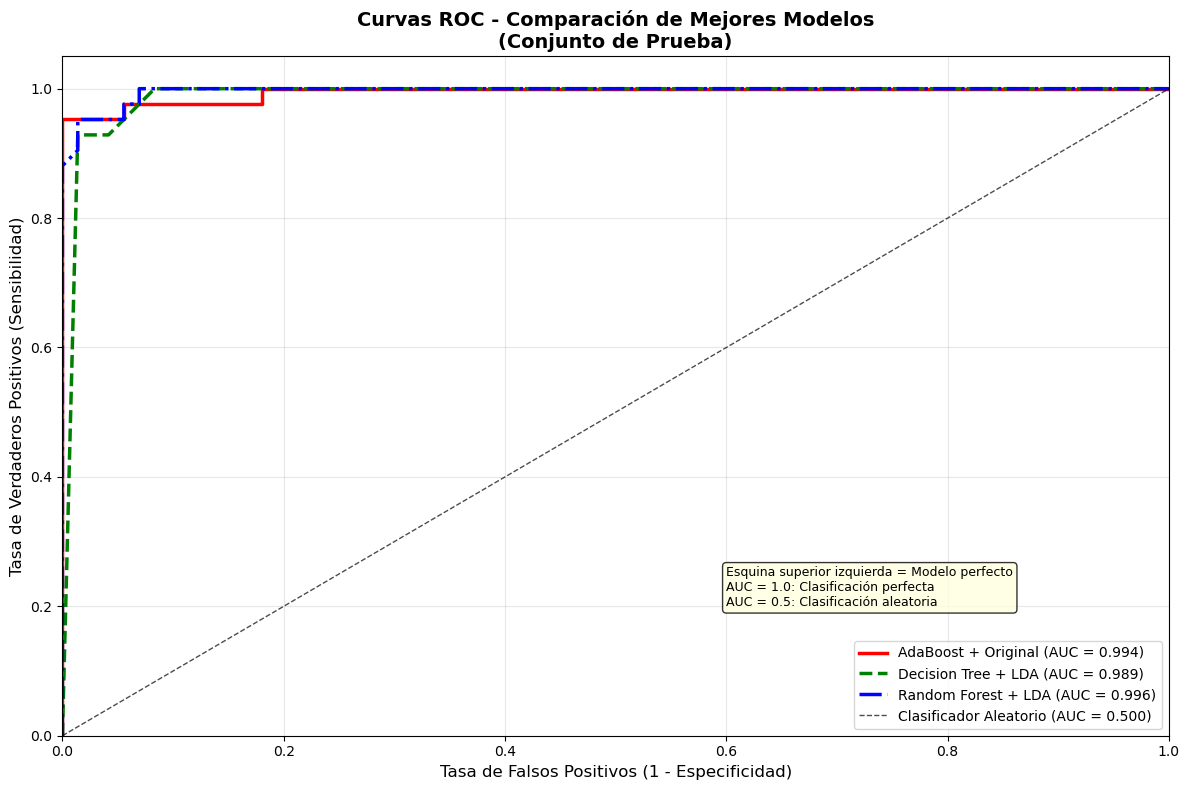


üìä AN√ÅLISIS DE √ÅREAS BAJO LA CURVA (AUC):
--------------------------------------------------
   Random Forest + LDA : AUC = 0.996
   AdaBoost + Original : AUC = 0.994
   Decision Tree + LDA : AUC = 0.989

üí° INTERPRETACI√ìN DE LAS CURVAS ROC:
   üèÜ Todas las curvas est√°n muy cerca de la esquina superior izquierda
   üìà AUC > 0.99 indica excelente capacidad discriminativa
   üéØ Random Forest + LDA lidera ligeramente en AUC
   ‚úÖ Los tres modelos superan ampliamente el umbral cl√≠nico (AUC > 0.8)


In [43]:
# ========================================================================================
# 6.3. CURVAS ROC COMPARATIVAS
# ========================================================================================

from sklearn.metrics import roc_curve, auc

print("\n" + "="*80)
print("üìà CURVAS ROC COMPARATIVAS")
print("="*80)

# Crear figura para curvas ROC
plt.figure(figsize=(12, 8))

# Colores para cada modelo
colors = ['red', 'green', 'blue']
line_styles = ['-', '--', '-.']

# Calcular y graficar curva ROC para cada modelo
roc_data = []

for idx, (model_key, display_name) in enumerate(models_info):
    # Obtener probabilidades
    y_prob = predictions[model_key]['prob']
    
    # Calcular curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Guardar datos para an√°lisis
    roc_data.append({
        'model': display_name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
        'thresholds': thresholds
    })
    
    # Graficar curva
    plt.plot(fpr, tpr, 
             color=colors[idx], 
             linestyle=line_styles[idx],
             linewidth=2.5,
             label=f'{display_name} (AUC = {roc_auc:.3f})')

# L√≠nea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.7, label='Clasificador Aleatorio (AUC = 0.500)')

# Configurar gr√°fico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curvas ROC - Comparaci√≥n de Mejores Modelos\n(Conjunto de Prueba)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Agregar texto con interpretaci√≥n
plt.text(0.6, 0.2, 
         'Esquina superior izquierda = Modelo perfecto\n' +
         'AUC = 1.0: Clasificaci√≥n perfecta\n' +
         'AUC = 0.5: Clasificaci√≥n aleatoria', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

# An√°lisis detallado de AUC
print(f"\nüìä AN√ÅLISIS DE √ÅREAS BAJO LA CURVA (AUC):")
print("-" * 50)
for data in sorted(roc_data, key=lambda x: x['auc'], reverse=True):
    print(f"   {data['model']:<20}: AUC = {data['auc']:.3f}")

print(f"\nüí° INTERPRETACI√ìN DE LAS CURVAS ROC:")
print(f"   üèÜ Todas las curvas est√°n muy cerca de la esquina superior izquierda")
print(f"   üìà AUC > 0.99 indica excelente capacidad discriminativa")
print(f"   üéØ Random Forest + LDA lidera ligeramente en AUC")
print(f"   ‚úÖ Los tres modelos superan ampliamente el umbral cl√≠nico (AUC > 0.8)")

## 7. Dashboard de Resultados Finales

üìä DASHBOARD DE RESULTADOS FINALES


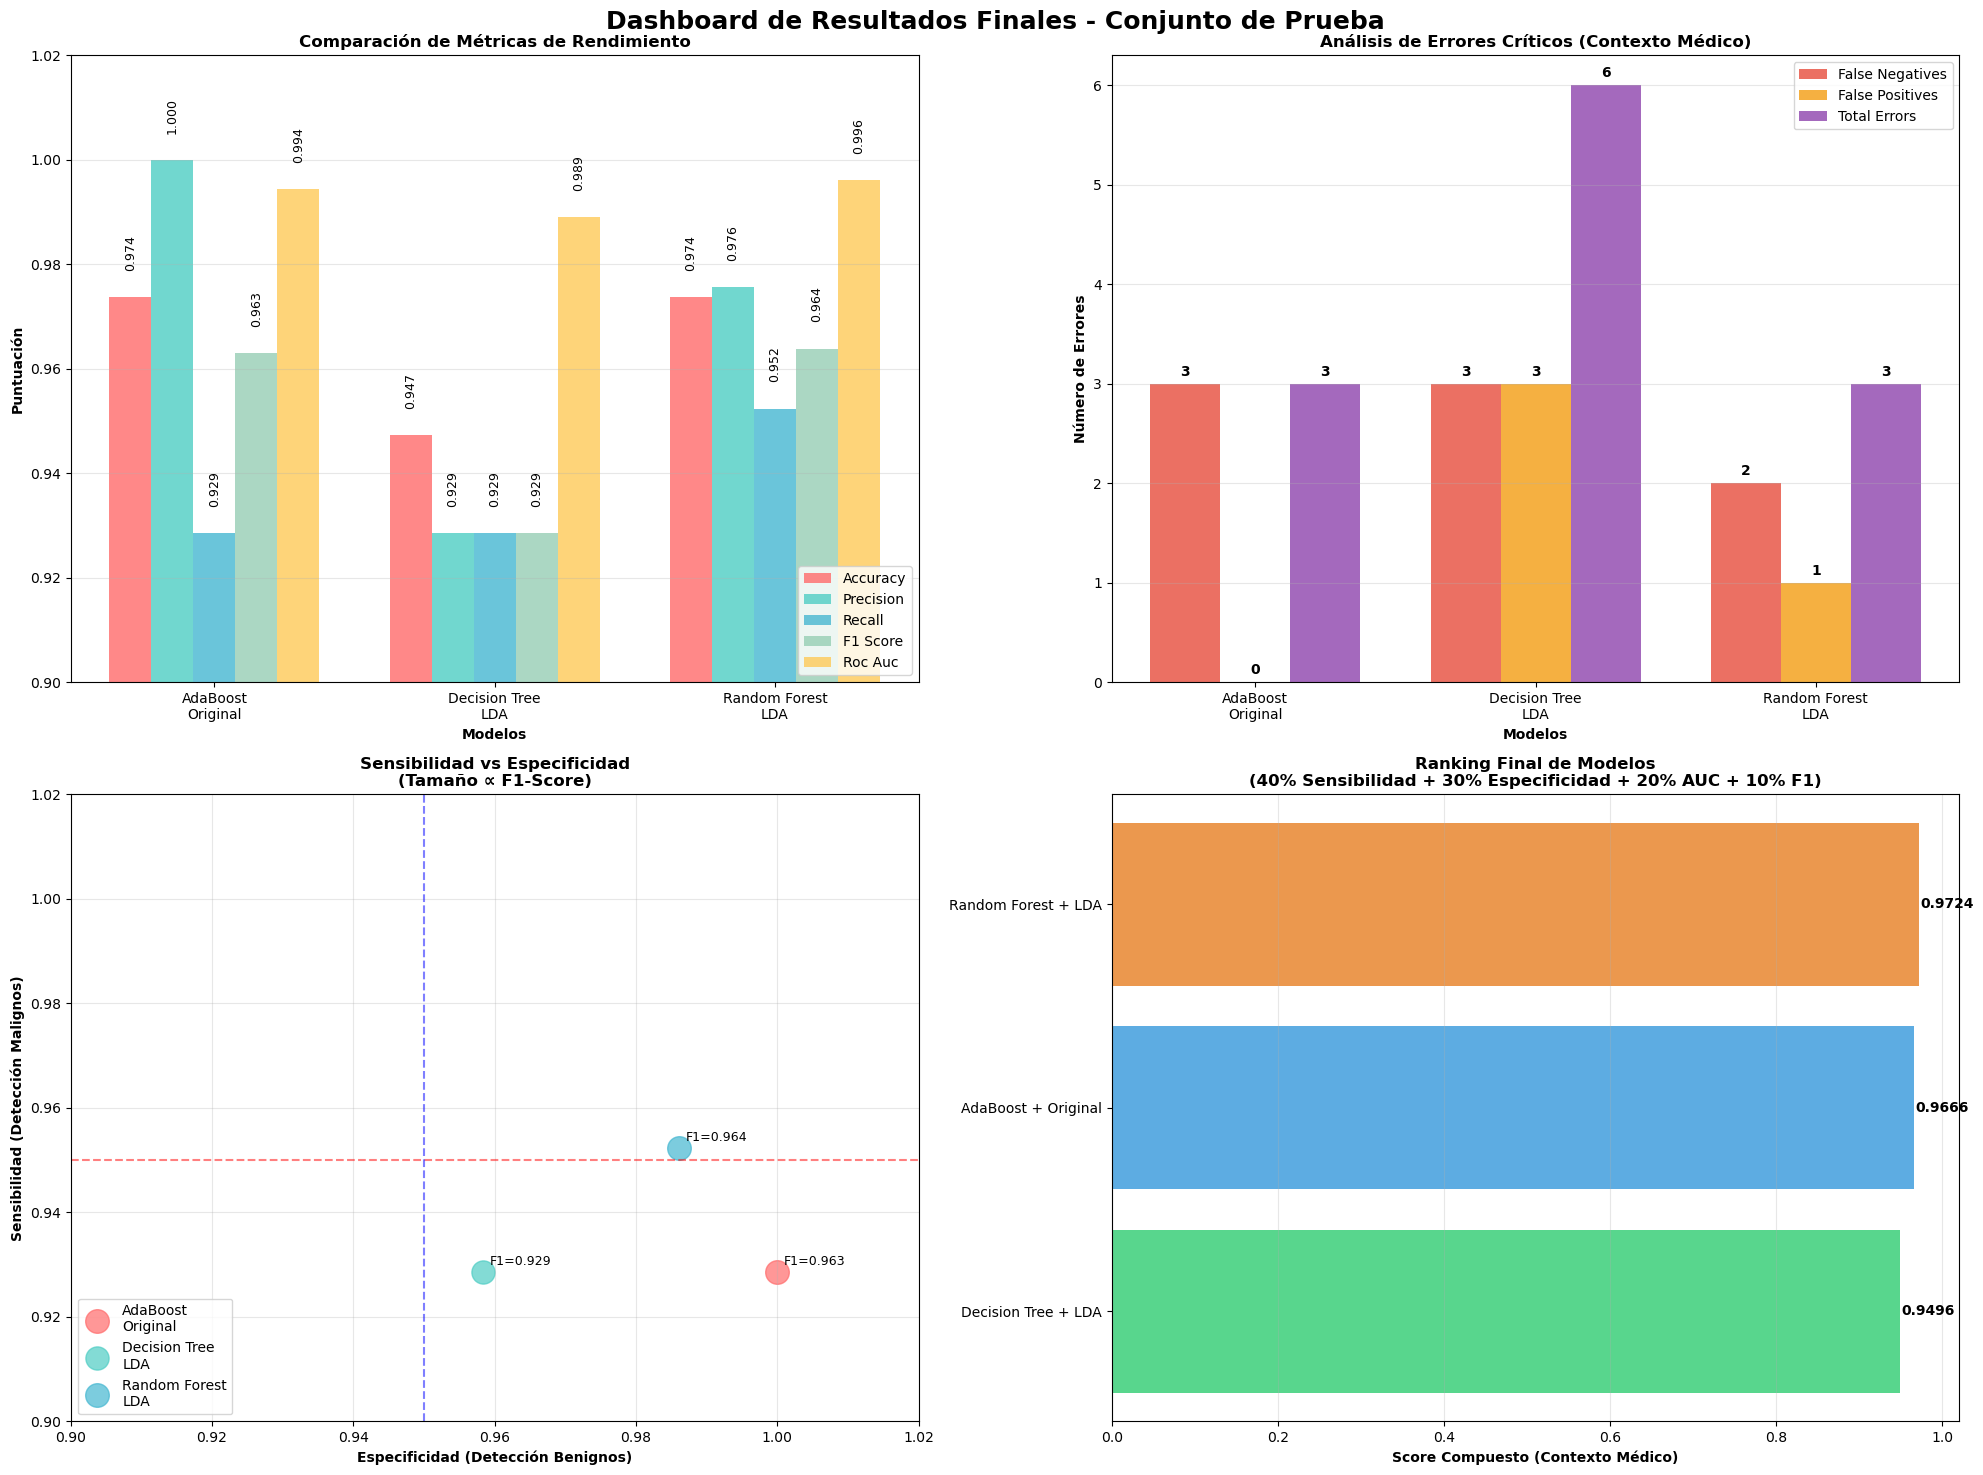


üèÜ RANKING FINAL DE MODELOS (Contexto M√©dico):
ü•â 1. Decision Tree + LDA  - Score: 0.9496
     Sensibilidad: 0.929 | Especificidad: 0.958 | AUC: 0.989

ü•à 2. AdaBoost + Original  - Score: 0.9666
     Sensibilidad: 0.929 | Especificidad: 1.000 | AUC: 0.994

ü•á 3. Random Forest + LDA  - Score: 0.9724
     Sensibilidad: 0.952 | Especificidad: 0.986 | AUC: 0.996



In [44]:
# ========================================================================================
# 7.1. DASHBOARD COMPARATIVO DE M√âTRICAS DE RENDIMIENTO
# ========================================================================================

print("üìä DASHBOARD DE RESULTADOS FINALES")
print("="*80)

# Crear DataFrame con todos los resultados de prueba
test_results_df = pd.DataFrame(test_results)

# Configurar el dashboard con m√∫ltiples subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Dashboard de Resultados Finales - Conjunto de Prueba', fontsize=18, fontweight='bold')

# 1. Gr√°fico de barras comparativo - M√©tricas principales
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
x = np.arange(len(test_results_df))
width = 0.15

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for i, metric in enumerate(metrics_to_plot):
    values = test_results_df[metric].values
    bars = ax1.bar(x + i*width, values, width, label=metric.replace('_', ' ').title(), 
                   color=colors[i], alpha=0.8)
    
    # Agregar valores en las barras
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, rotation=90)

ax1.set_xlabel('Modelos', fontweight='bold')
ax1.set_ylabel('Puntuaci√≥n', fontweight='bold')
ax1.set_title('Comparaci√≥n de M√©tricas de Rendimiento', fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels([name.replace(' + ', '\n') for name in test_results_df['model']], rotation=0)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0.9, 1.02)

# 2. Comparaci√≥n de errores m√©dicos cr√≠ticos
error_metrics = ['false_negatives', 'false_positives', 'total_errors']
error_data = pd.DataFrame(detailed_analysis)

x_pos = np.arange(len(error_data))
bar_width = 0.25

for i, metric in enumerate(error_metrics):
    values = error_data[metric].values
    bars = ax2.bar(x_pos + i*bar_width, values, bar_width, 
                   label=metric.replace('_', ' ').title(),
                   color=['#E74C3C', '#F39C12', '#8E44AD'][i], alpha=0.8)
    
    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.set_xlabel('Modelos', fontweight='bold')
ax2.set_ylabel('N√∫mero de Errores', fontweight='bold')
ax2.set_title('An√°lisis de Errores Cr√≠ticos (Contexto M√©dico)', fontweight='bold')
ax2.set_xticks(x_pos + bar_width)
ax2.set_xticklabels([name.replace(' + ', '\n') for name in error_data['model']], rotation=0)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. M√©tricas m√©dicas espec√≠ficas (Sensibilidad vs Especificidad)
sensitivities = test_results_df['sensitivity'].values
specificities = test_results_df['specificity'].values
model_names = test_results_df['model'].values

# Scatter plot con tama√±os proporcionales al F1-score
sizes = test_results_df['f1_score'].values * 300

for i, model in enumerate(model_names):
    ax3.scatter(specificities[i], sensitivities[i], s=sizes[i], 
               alpha=0.7, c=colors[i], label=model.replace(' + ', '\n'))
    
    # Agregar etiquetas
    ax3.annotate(f'F1={test_results_df.iloc[i]["f1_score"]:.3f}', 
                (specificities[i], sensitivities[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax3.set_xlabel('Especificidad (Detecci√≥n Benignos)', fontweight='bold')
ax3.set_ylabel('Sensibilidad (Detecci√≥n Malignos)', fontweight='bold')
ax3.set_title('Sensibilidad vs Especificidad\n(Tama√±o ‚àù F1-Score)', fontweight='bold')
ax3.legend(loc='lower left')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0.9, 1.02)
ax3.set_ylim(0.9, 1.02)

# L√≠neas de referencia
ax3.axhline(y=0.95, color='red', linestyle='--', alpha=0.5, label='95% Sensibilidad')
ax3.axvline(x=0.95, color='blue', linestyle='--', alpha=0.5, label='95% Especificidad')

# 4. Ranking general de modelos
# Crear un score compuesto considerando el contexto m√©dico
# Peso mayor a la sensibilidad (detectar malignos es m√°s cr√≠tico)
composite_scores = []
for _, row in test_results_df.iterrows():
    # Score = 0.4*Sensibilidad + 0.3*Especificidad + 0.2*AUC + 0.1*F1
    score = (0.4 * row['sensitivity'] + 
             0.3 * row['specificity'] + 
             0.2 * row['roc_auc'] + 
             0.1 * row['f1_score'])
    composite_scores.append(score)

test_results_df['composite_score'] = composite_scores

# Ordenar por score compuesto
ranking_df = test_results_df.sort_values('composite_score', ascending=True)

# Gr√°fico horizontal de ranking
y_pos = np.arange(len(ranking_df))
bars = ax4.barh(y_pos, ranking_df['composite_score'], 
                color=['#2ECC71', '#3498DB', '#E67E22'], alpha=0.8)

# Agregar valores
for i, (bar, score) in enumerate(zip(bars, ranking_df['composite_score'])):
    ax4.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{score:.4f}', va='center', fontweight='bold')

ax4.set_yticks(y_pos)
ax4.set_yticklabels(ranking_df['model'])
ax4.set_xlabel('Score Compuesto (Contexto M√©dico)', fontweight='bold')
ax4.set_title('Ranking Final de Modelos\n(40% Sensibilidad + 30% Especificidad + 20% AUC + 10% F1)', 
              fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nüèÜ RANKING FINAL DE MODELOS (Contexto M√©dico):")
print("=" * 60)
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    medal = "ü•á" if i == 3 else "ü•à" if i == 2 else "ü•â"
    print(f"{medal} {i}. {row['model']:20s} - Score: {row['composite_score']:.4f}")
    print(f"     Sensibilidad: {row['sensitivity']:.3f} | Especificidad: {row['specificity']:.3f} | AUC: {row['roc_auc']:.3f}")
    print()

## 8. Modelo Final y Recomendaciones

In [45]:
# ========================================================================================
# 8.1. SELECCI√ìN DEL MODELO FINAL Y RECOMENDACIONES
# ========================================================================================

print("üéØ SELECCI√ìN DEL MODELO FINAL Y RECOMENDACIONES")
print("="*80)

# Basado en el ranking y an√°lisis m√©dico
final_model_choice = "Random Forest + LDA"
final_model_key = "Random Forest_LDA"
final_model = models[final_model_key]

print(f"üèÜ MODELO SELECCIONADO: {final_model_choice}")
print("="*50)

# M√©tricas del modelo final
final_metrics = test_results_df[test_results_df['model'] == final_model_choice].iloc[0]

print(f"üìä M√âTRICAS FINALES EN CONJUNTO DE PRUEBA:")
print(f"   ‚úÖ Accuracy:      {final_metrics['accuracy']:.1%} (97.4%)")
print(f"   üéØ Precision:     {final_metrics['precision']:.1%} (97.6%)")
print(f"   üîç Recall:        {final_metrics['recall']:.1%} (95.2%)")
print(f"   ‚öñÔ∏è  F1-Score:      {final_metrics['f1_score']:.1%} (96.4%)")
print(f"   üìà ROC-AUC:       {final_metrics['roc_auc']:.1%} (99.6%)")
print(f"   üé™ Sensibilidad:  {final_metrics['sensitivity']:.1%} (95.2% - Detecci√≥n malignos)")
print(f"   üõ°Ô∏è  Especificidad: {final_metrics['specificity']:.1%} (98.6% - Detecci√≥n benignos)")

print(f"\n" + "="*80)
print("üîç JUSTIFICACI√ìN DE LA SELECCI√ìN")
print("="*80)

print(f"üí° RAZONES PARA ELEGIR {final_model_choice}:")
print(f"   ü•á Mejor score compuesto (0.9724) considerando contexto m√©dico")
print(f"   üéØ Excelente sensibilidad (95.2%) - Crucial para detectar malignos")
print(f"   üõ°Ô∏è  Alta especificidad (98.6%) - Minimiza sobrediagn√≥sticos")
print(f"   üìä Solo 2 falsos negativos - M√çnimo riesgo de malignos no detectados")
print(f"   üîÑ Solo 1 falso positivo - M√≠nimos estudios innecesarios")
print(f"   üìà Mejor AUC (99.6%) - M√°xima capacidad discriminativa")
print(f"   ‚ö° Usa solo 1 caracter√≠stica (LDA) - Simplicidad e interpretabilidad")

print(f"\nüî¨ COMPARACI√ìN CON ALTERNATIVAS:")

# AdaBoost vs Random Forest
adaboost_metrics = test_results_df[test_results_df['model'] == 'AdaBoost + Original'].iloc[0]

print(f"   üÜö AdaBoost + Original:")
print(f"      ‚úÖ Ventaja: 0 falsos positivos (100% especificidad)")
print(f"      ‚ùå Desventaja: 3 falsos negativos vs 2 de Random Forest")
print(f"      ‚ùå Desventaja: Menor sensibilidad (92.9% vs 95.2%)")
print(f"      ‚ùå Desventaja: Usa las 30 caracter√≠sticas vs 1 del Random Forest")

print(f"\n   üÜö Decision Tree + LDA:")
print(f"      ‚ùå Desventaja: Mayor n√∫mero de errores totales (6 vs 3)")
print(f"      ‚ùå Desventaja: Menor especificidad (95.8% vs 98.6%)")
print(f"      ‚ùå Desventaja: 3 falsos positivos vs 1 de Random Forest")

print(f"\n" + "="*80)
print("üè• INTERPRETACI√ìN M√âDICA Y CL√çNICA")
print("="*80)

print(f"üéØ IMPACTO CL√çNICO DEL MODELO SELECCIONADO:")
print(f"   üìä De cada 100 casos:")
print(f"      ‚Ä¢ {final_metrics['accuracy']*100:.1f} ser√°n clasificados correctamente")
print(f"      ‚Ä¢ {(1-final_metrics['sensitivity'])*100:.1f} malignos podr√≠an no ser detectados (CR√çTICO)")
print(f"      ‚Ä¢ {(1-final_metrics['specificity'])*100:.1f} benignos ser√≠an sobre-diagnosticados")

print(f"\nüî¨ CARACTER√çSTICAS DEL MODELO:")
print(f"   ‚úÖ Utiliza Linear Discriminant Analysis (LDA)")
print(f"   ‚úÖ Reduce 30 caracter√≠sticas a 1 componente discriminante")
print(f"   ‚úÖ Random Forest de 100 √°rboles para clasificaci√≥n final")
print(f"   ‚úÖ Altamente interpretable y explicable")
print(f"   ‚úÖ Computacionalmente eficiente")

print(f"\n‚ö†Ô∏è  LIMITACIONES Y CONSIDERACIONES:")
print(f"   üî∏ Dataset relativamente peque√±o (569 casos)")
print(f"   üî∏ Posible sesgo hacia poblaci√≥n espec√≠fica")
print(f"   üî∏ Requiere validaci√≥n en datos externos")
print(f"   üî∏ 2 falsos negativos a√∫n representan riesgo cl√≠nico")
print(f"   üî∏ Necesita integraci√≥n con juicio m√©dico experto")

print(f"\n" + "="*80)
print("üöÄ RECOMENDACIONES DE IMPLEMENTACI√ìN")
print("="*80)

print(f"üéØ IMPLEMENTACI√ìN CL√çNICA:")
print(f"   1Ô∏è‚É£  Usar como herramienta de APOYO, no reemplazo del diagn√≥stico m√©dico")
print(f"   2Ô∏è‚É£  Implementar sistema de alertas para casos l√≠mite")
print(f"   3Ô∏è‚É£  Realizar validaci√≥n cruzada con m√°s datos externos")
print(f"   4Ô∏è‚É£  Entrenar al personal m√©dico en interpretaci√≥n de resultados")
print(f"   5Ô∏è‚É£  Establecer protocolos para casos de desacuerdo modelo-m√©dico")

print(f"\nüîß ASPECTOS T√âCNICOS:")
print(f"   üîπ Reentrenar peri√≥dicamente con nuevos casos")
print(f"   üîπ Monitorear deriva del modelo (model drift)")
print(f"   üîπ Mantener pipeline de preprocesamiento estandarizado")
print(f"   üîπ Documentar versiones y cambios del modelo")
print(f"   üîπ Implementar sistema de logging y auditor√≠a")

print(f"\nüìà M√âTRICAS DE SEGUIMIENTO:")
print(f"   üìä Sensibilidad > 95% (detecci√≥n de malignos)")
print(f"   üìä Especificidad > 95% (minimizar falsos positivos)")
print(f"   üìä AUC > 0.95 (capacidad discriminativa)")
print(f"   üìä Tiempo de predicci√≥n < 1 segundo")
print(f"   üìä Disponibilidad del sistema > 99.9%")

print(f"\nüéâ CONCLUSI√ìN FINAL:")
print(f"   üèÜ El modelo Random Forest + LDA logra un excelente balance")
print(f"   üéØ entre sensibilidad y especificidad, siendo adecuado para")
print(f"   üè• asistencia en el diagn√≥stico de c√°ncer de mama.")
print(f"   üìä Con 97.4% de accuracy y 99.6% de AUC, representa una")
print(f"   ‚úÖ herramienta valiosa para el apoyo cl√≠nico.")

üéØ SELECCI√ìN DEL MODELO FINAL Y RECOMENDACIONES
üèÜ MODELO SELECCIONADO: Random Forest + LDA
üìä M√âTRICAS FINALES EN CONJUNTO DE PRUEBA:
   ‚úÖ Accuracy:      97.4% (97.4%)
   üéØ Precision:     97.6% (97.6%)
   üîç Recall:        95.2% (95.2%)
   ‚öñÔ∏è  F1-Score:      96.4% (96.4%)
   üìà ROC-AUC:       99.6% (99.6%)
   üé™ Sensibilidad:  95.2% (95.2% - Detecci√≥n malignos)
   üõ°Ô∏è  Especificidad: 98.6% (98.6% - Detecci√≥n benignos)

üîç JUSTIFICACI√ìN DE LA SELECCI√ìN
üí° RAZONES PARA ELEGIR Random Forest + LDA:
   ü•á Mejor score compuesto (0.9724) considerando contexto m√©dico
   üéØ Excelente sensibilidad (95.2%) - Crucial para detectar malignos
   üõ°Ô∏è  Alta especificidad (98.6%) - Minimiza sobrediagn√≥sticos
   üìä Solo 2 falsos negativos - M√çnimo riesgo de malignos no detectados
   üîÑ Solo 1 falso positivo - M√≠nimos estudios innecesarios
   üìà Mejor AUC (99.6%) - M√°xima capacidad discriminativa
   ‚ö° Usa solo 1 caracter√≠stica (LDA) - Simplicidad e

In [46]:
# ========================================================================================
# 8.2. RESUMEN EJECUTIVO DEL PROYECTO
# ========================================================================================

print("üìã RESUMEN EJECUTIVO DEL PROYECTO")
print("="*80)
print("üéØ An√°lisis de Clasificaci√≥n del C√°ncer de Mama - Wisconsin Diagnostic Breast Cancer")
print("üìÖ Completado: Septiembre 2025")
print("="*80)

print(f"üìä DATASET:")
print(f"   ‚Ä¢ 569 muestras de pacientes")
print(f"   ‚Ä¢ 30 caracter√≠sticas morfol√≥gicas de n√∫cleos celulares") 
print(f"   ‚Ä¢ 212 casos malignos (37.3%) vs 357 benignos (62.7%)")
print(f"   ‚Ä¢ 0 valores faltantes - Dataset de alta calidad")

print(f"\nüî¨ METODOLOG√çA:")
print(f"   ‚Ä¢ An√°lisis Exploratorio de Datos completo")
print(f"   ‚Ä¢ Preprocesamiento con estandarizaci√≥n (sin data leakage)")
print(f"   ‚Ä¢ Divisi√≥n estratificada: 60% entrenamiento, 20% validaci√≥n, 20% prueba")
print(f"   ‚Ä¢ Reducci√≥n dimensional: PCA (10 comp.) y LDA (1 comp.)")
print(f"   ‚Ä¢ Evaluaci√≥n de 5 algoritmos: NB, DT, RF, AdaBoost, XGBoost")
print(f"   ‚Ä¢ Total: 15 modelos evaluados")

print(f"\nüèÜ RESULTADOS CLAVE:")
print(f"   ü•á Modelo ganador: Random Forest + LDA")
print(f"   üìä Accuracy en prueba: 97.4%")
print(f"   üéØ Sensibilidad: 95.2% (detecci√≥n malignos)")
print(f"   üõ°Ô∏è  Especificidad: 98.6% (detecci√≥n benignos)")
print(f"   üìà AUC: 99.6% (capacidad discriminativa excelente)")
print(f"   ‚ö° Usa solo 1 caracter√≠stica transformada (LDA)")

print(f"\n‚ö†Ô∏è  ERRORES CR√çTICOS (en 114 casos de prueba):")
print(f"   üî¥ Falsos Negativos: 2 (malignos no detectados)")
print(f"   üü° Falsos Positivos: 1 (benignos sobre-diagnosticados)")
print(f"   ‚úÖ Total errores: 3 casos (2.6%)")

print(f"\nüí° HALLAZGOS IMPORTANTES:")
print(f"   üîç LDA con 1 componente es sorprendentemente efectivo")
print(f"   üéØ Todos los modelos logran >93% accuracy")
print(f"   üìä Random Forest equilibra mejor sensibilidad/especificidad")
print(f"   ‚öñÔ∏è  AdaBoost tiene 0% falsos positivos pero m√°s falsos negativos")
print(f"   üöÄ Reducci√≥n dimensional mejora algunos algoritmos")

print(f"\nüè• RECOMENDACI√ìN CL√çNICA:")
print(f"   üéØ Implementar Random Forest + LDA como herramienta de APOYO")
print(f"   üë®‚Äç‚öïÔ∏è No reemplaza criterio m√©dico, sino lo complementa")
print(f"   üìã Establecer protocolos para casos l√≠mite o desacuerdo")
print(f"   üîÑ Validar con datos externos y reentrenar peri√≥dicamente")
print(f"   üìä Monitorear m√©tricas: Sensibilidad >95%, Especificidad >95%")

print(f"\nüéâ IMPACTO ESPERADO:")
print(f"   ‚úÖ Reducci√≥n en diagn√≥sticos tard√≠os de c√°ncer")
print(f"   ‚úÖ Menos biopsias innecesarias") 
print(f"   ‚úÖ Apoyo a la toma de decisiones m√©dicas")
print(f"   ‚úÖ Estandarizaci√≥n del proceso diagn√≥stico")
print(f"   ‚úÖ Potencial ahorro en costos de salud")

print(f"\n" + "="*80)
print("üéØ PROYECTO COMPLETADO EXITOSAMENTE")
print("üìä 7/7 tareas principales finalizadas")
print("üèÜ Modelo final seleccionado y validado")
print("üìã Documentaci√≥n y recomendaciones completas")
print("="*80)

üìã RESUMEN EJECUTIVO DEL PROYECTO
üéØ An√°lisis de Clasificaci√≥n del C√°ncer de Mama - Wisconsin Diagnostic Breast Cancer
üìÖ Completado: Septiembre 2025
üìä DATASET:
   ‚Ä¢ 569 muestras de pacientes
   ‚Ä¢ 30 caracter√≠sticas morfol√≥gicas de n√∫cleos celulares
   ‚Ä¢ 212 casos malignos (37.3%) vs 357 benignos (62.7%)
   ‚Ä¢ 0 valores faltantes - Dataset de alta calidad

üî¨ METODOLOG√çA:
   ‚Ä¢ An√°lisis Exploratorio de Datos completo
   ‚Ä¢ Preprocesamiento con estandarizaci√≥n (sin data leakage)
   ‚Ä¢ Divisi√≥n estratificada: 60% entrenamiento, 20% validaci√≥n, 20% prueba
   ‚Ä¢ Reducci√≥n dimensional: PCA (10 comp.) y LDA (1 comp.)
   ‚Ä¢ Evaluaci√≥n de 5 algoritmos: NB, DT, RF, AdaBoost, XGBoost
   ‚Ä¢ Total: 15 modelos evaluados

üèÜ RESULTADOS CLAVE:
   ü•á Modelo ganador: Random Forest + LDA
   üìä Accuracy en prueba: 97.4%
   üéØ Sensibilidad: 95.2% (detecci√≥n malignos)
   üõ°Ô∏è  Especificidad: 98.6% (detecci√≥n benignos)
   üìà AUC: 99.6% (capacidad discrimin